### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. 


В этом ноутбуке используется библиотека `folium` для визуализации карт. 

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка

**Задание 1**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
!pip install -q kaggle

from google.colab import files
uploaded = files.upload()  # Для выбора kaggle.json файла

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Настройка Kaggle API завершена!")

Saving kaggle.json to kaggle.json
✅ Настройка Kaggle API завершена!


In [5]:
!kaggle competitions download -c nyc-taxi-trip-duration

 92% 79.0M/85.8M [00:00<00:00, 825MB/s]
100% 85.8M/85.8M [00:00<00:00, 804MB/s]


In [6]:
!unzip nyc-taxi-trip-duration.zip
!unzip train.zip
!unzip test.zip

Archive:  nyc-taxi-trip-duration.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               
Archive:  train.zip
  inflating: train.csv               
Archive:  test.zip
  inflating: test.csv                


In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train = pd.read_csv('train.csv')
df_train

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.drop(columns='dropoff_datetime', inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 111.3+ MB


In [9]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

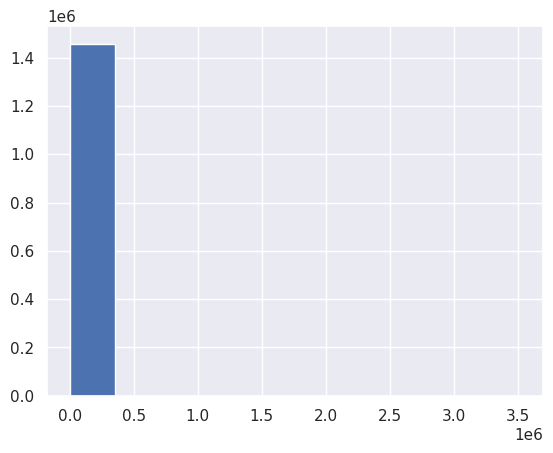

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df_train['trip_duration'])
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Гистограмма получилась не ясной, потому что тут есть выбросы. Чтобы избавиться от этого, мы дальше будем строить распределение в логарифмической шкале.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** RMSLE имеет значение относительной ошибки, а RMSE абсолютной. RMSLE предпочтительнее RMSE для прогнозирования длительности поездок, поскольку данные имеют значительный разброс и выбросы. В отличие от RMSE, которая сильно зависит от экстремальных значений, RMSLE работает с логарифмами ошибок, делая метрику более устойчивой к аномалиям. Кроме того, RMSLE лучше отражает относительную важность ошибок, что критично при разном масштабе значений целевой переменной.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:

$a(x_i) = \exp(\hat{a}(x_i)) - 1$ = $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$,

$\hat{y}_i = \log{(y_i + 1)}$ = $\log{(\exp({a}(x_i)) - 1 + 1)} = {a}(x_i)$

Аналогично для $\hat{a}(x_i)$:

$\hat{a}(x_i) = \exp({a}(x_i)) - 1 = \log{(\exp(\hat{a}(x_i)) - 1 + 1)} = \hat{a}(x_i)$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

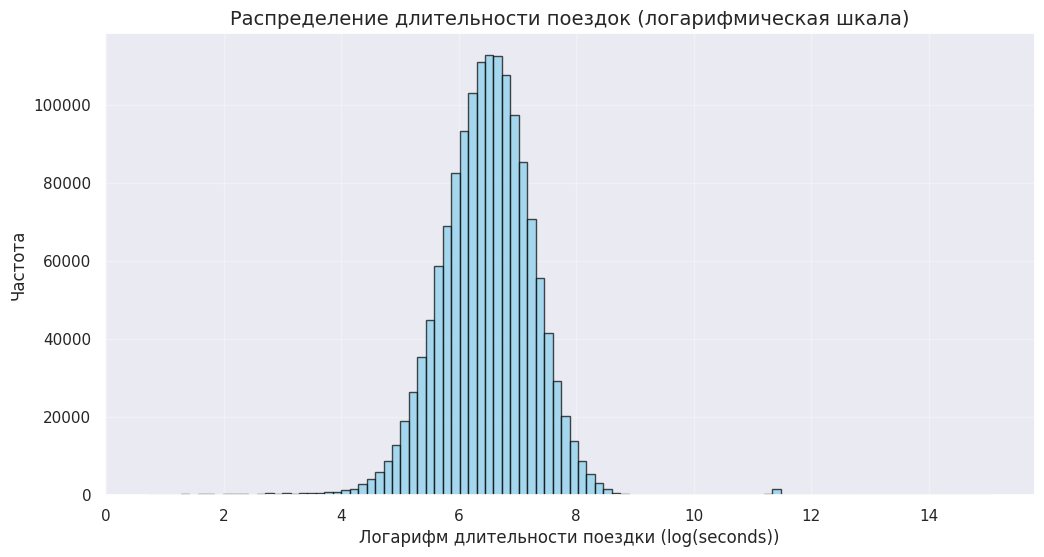

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(12, 6))

df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'].values)

# Логарифмическая шкала для лучшей визуализации
plt.hist(df_train['log_trip_duration'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Логарифм длительности поездки (log(seconds))', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение длительности поездок (логарифмическая шкала)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [12]:
df_train.drop(columns=['trip_duration']) # inplace=False, этот столбец в исходном датасете оставим, т.к. понадобится в дальнейшей работе

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [13]:
def rmsle(logip_y_true, login_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:
    return np.sqrt(np.mean((logip_y_true - login_y_pred)**2))
    raise NotImplementedError("Значения не сходятся")

# Для RMSLE наилучшее константное предсказание - это среднее логарифмированной целевой переменной
best_constant_pred = np.mean(df_train['log_trip_duration'])

rmsle_best_const = rmsle(df_train['log_trip_duration'],
                         np.full_like(df_train['log_trip_duration'], best_constant_pred))

print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime`

**Задание 2**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

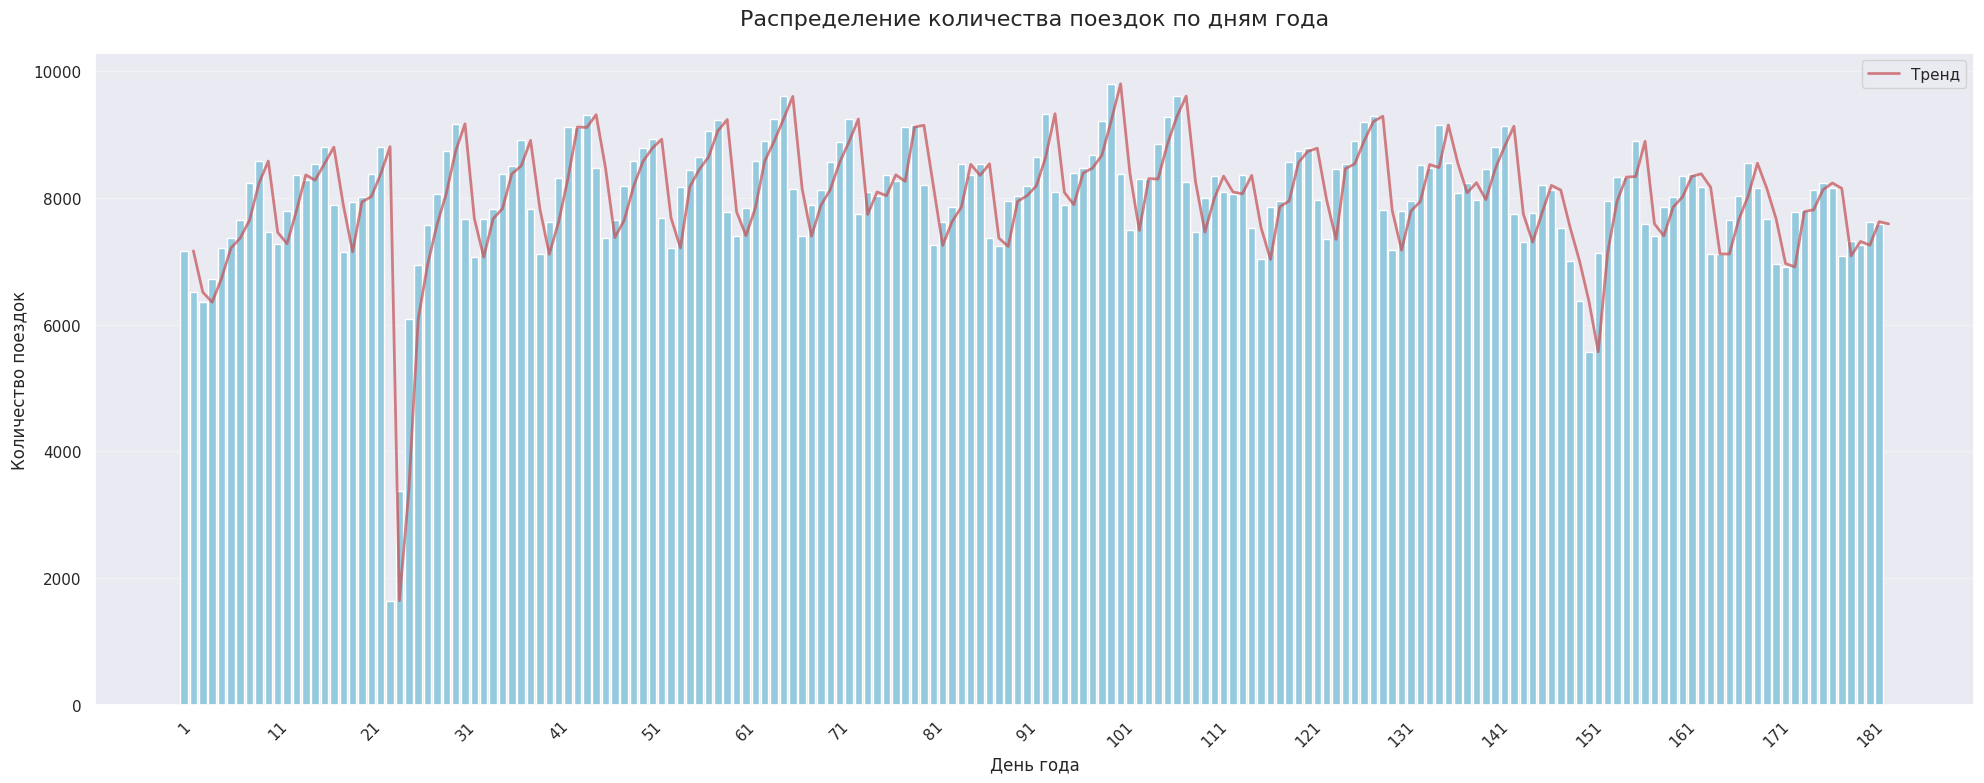

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(20, 8))

# Используем день года вместо даты для лучшей группировки
df_train['day_of_year'] = df_train['pickup_datetime'].dt.dayofyear

sns.countplot(data=df_train, x='day_of_year', color='skyblue')

plt.xlabel('День года', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.title('Распределение количества поездок по дням года', fontsize=16, pad=20)

# Каждая 10-я метка для читаемости
plt.xticks(ticks=range(0, 365, 10), rotation=45)
plt.grid(axis='y', alpha=0.3)

# Линия тренда
x = df_train['day_of_year'].value_counts().sort_index().index
y = df_train['day_of_year'].value_counts().sort_index().values
plt.plot(x, y, 'r-', alpha=0.7, linewidth=2, label='Тренд')

plt.legend()
plt.tight_layout()
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['pickup_datetime'].dt.date.value_counts()[-2:]

pickup_datetime
2016-01-24    3383
2016-01-23    1648
Name: count, dtype: int64

Причина: [Власти запретили автомобильное движение в Нью-Йорке из-за снежной бури](https://ria.ru/20160123/1364032228.html).

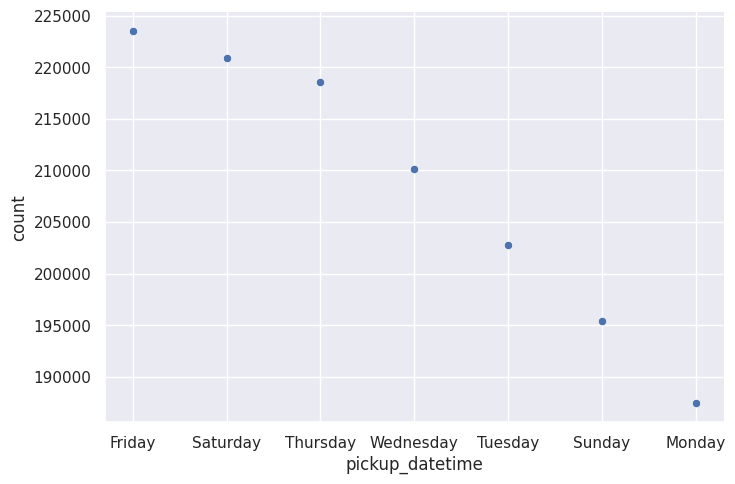

In [16]:
x = df_train['pickup_datetime'].dt.day_name().value_counts().index
y = df_train['pickup_datetime'].dt.day_name().value_counts()
sns.relplot(x = x, y = y, aspect=1.5)

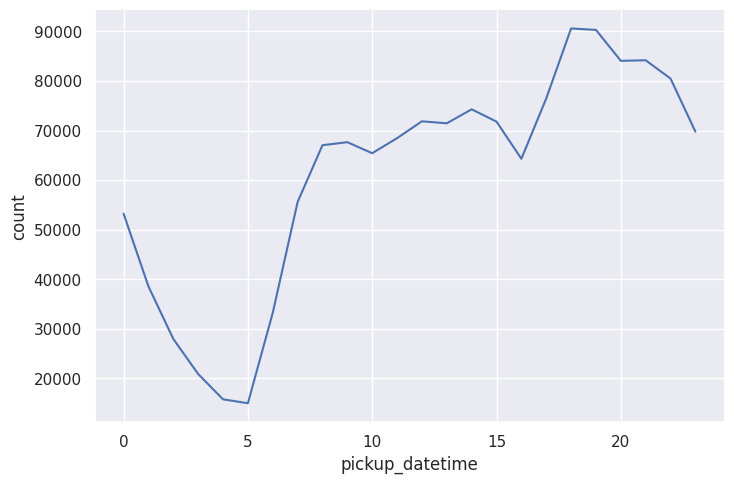

In [17]:
x = df_train['pickup_datetime'].dt.hour.value_counts().index
y = df_train['pickup_datetime'].dt.hour.value_counts()
sns.relplot(x = x, y = y, aspect=1.5, kind='line')

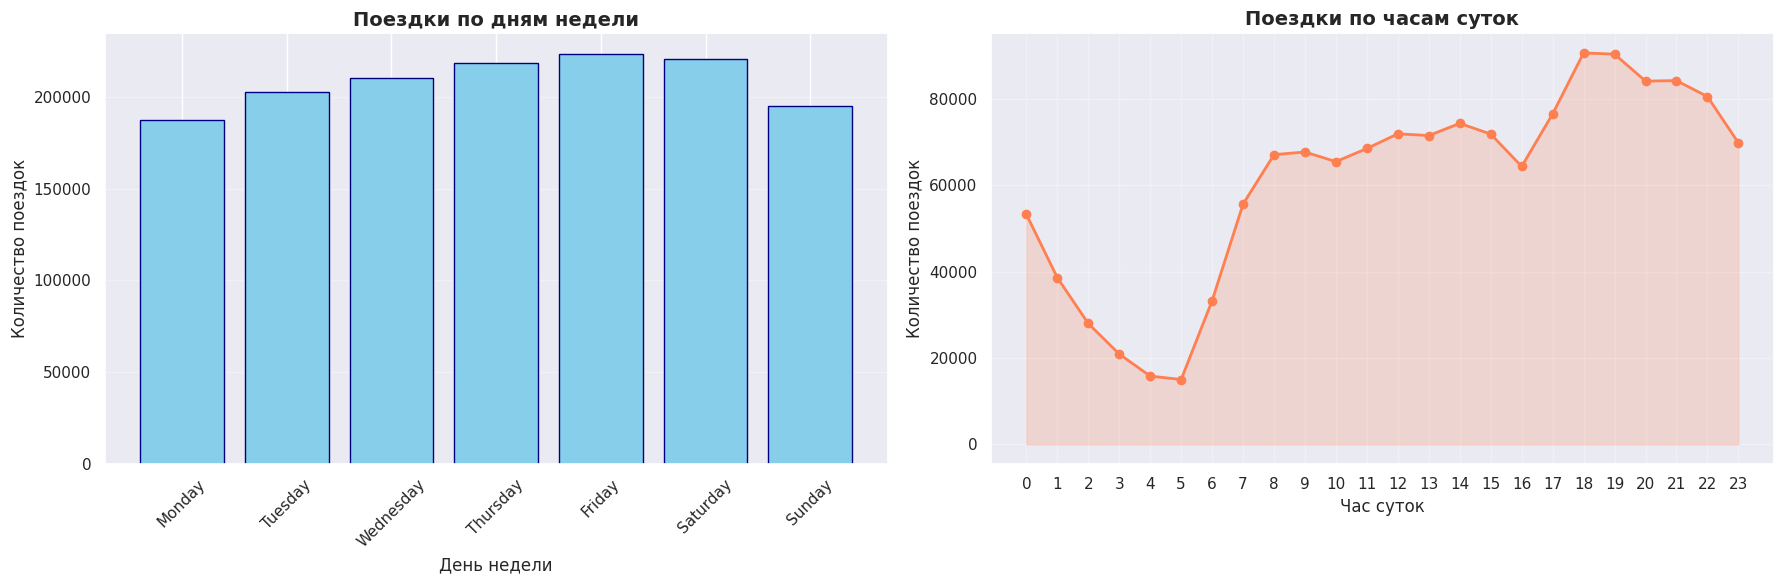

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# График дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_train['pickup_datetime'].dt.day_name().value_counts().reindex(days_order)
bars1 = ax1.bar(day_counts.index, day_counts.values, color='skyblue', edgecolor='navy')
ax1.set_title('Поездки по дням недели', fontsize=14, fontweight='bold')
ax1.set_xlabel('День недели')
ax1.set_ylabel('Количество поездок')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# График часов
hour_counts = df_train['pickup_datetime'].dt.hour.value_counts().sort_index()
ax2.plot(hour_counts.index, hour_counts.values, linewidth=2, marker='o', color='coral')
ax2.fill_between(hour_counts.index, hour_counts.values, alpha=0.2, color='coral')
ax2.set_title('Поездки по часам суток', fontsize=14, fontweight='bold')
ax2.set_xlabel('Час суток')
ax2.set_ylabel('Количество поездок')
ax2.set_xticks(range(0, 24))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Задание 3**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

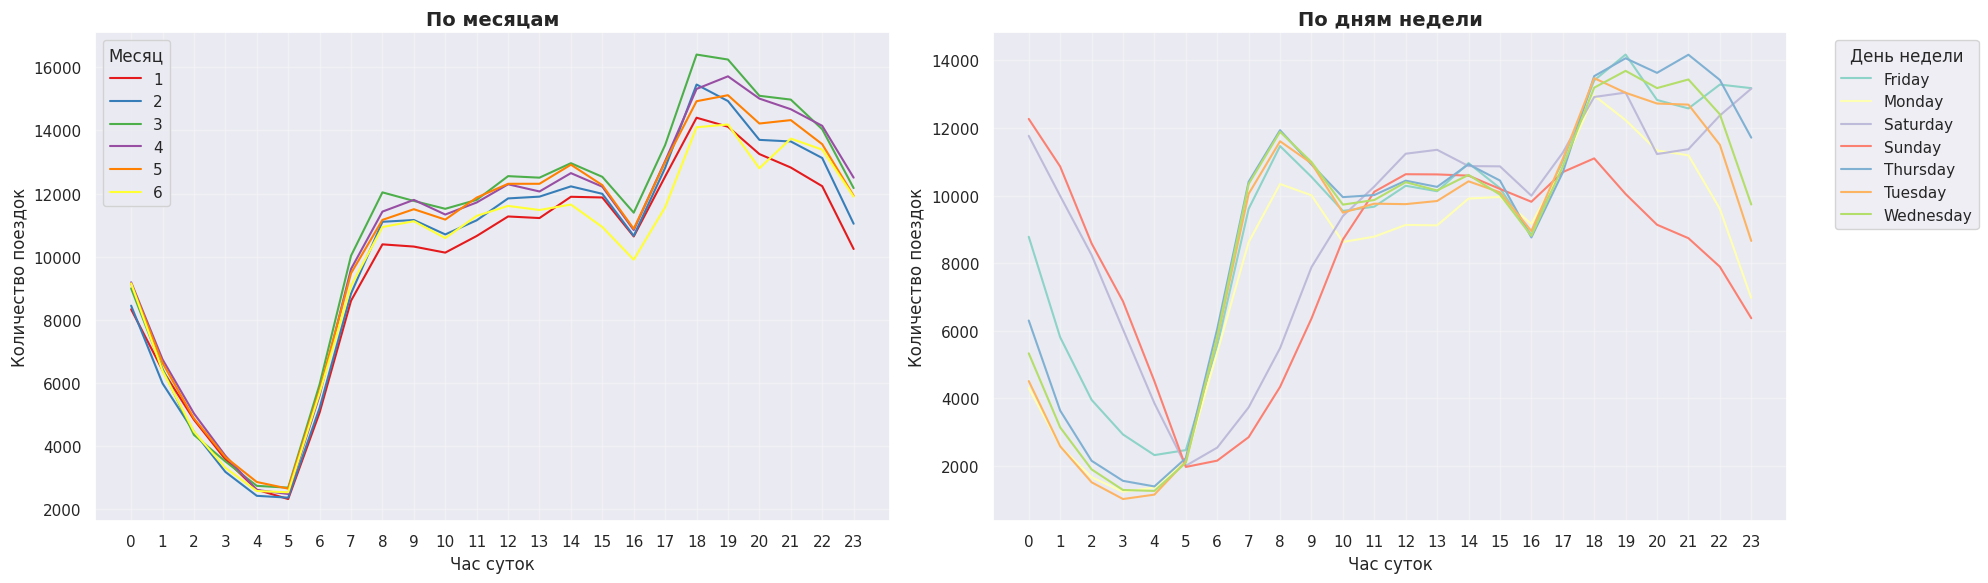

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()

month_hour_counts = df_train.groupby(['month', 'hour']).size().reset_index(name='count')
day_hour_counts = df_train.groupby(['day_of_week', 'hour']).size().reset_index(name='count')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# График по месяцам
sns.lineplot(data=month_hour_counts, x='hour', y='count', hue='month', ax=ax1, palette='Set1')
ax1.set_title('По месяцам', fontsize=14, fontweight='bold')
ax1.set_xlabel('Час суток')
ax1.set_ylabel('Количество поездок')
ax1.set_xticks(range(0, 24))
ax1.grid(alpha=0.3)
ax1.legend(title='Месяц')

# График по дням недели
sns.lineplot(data=day_hour_counts, x='hour', y='count', hue='day_of_week', ax=ax2, palette='Set3')
ax2.set_title('По дням недели', fontsize=14, fontweight='bold')
ax2.set_xlabel('Час суток')
ax2.set_ylabel('Количество поездок')
ax2.set_xticks(range(0, 24))
ax2.grid(alpha=0.3)
ax2.legend(title='День недели', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ:** Месяца практичестки не различаются, дни недели имеют небольшие отличия. Например, можно заметить, что по субботам и воскресеньям люди просыпаются позже (логично, так как это выходные). Также в будние дни возрастает количество поездок после 5 утра (люди едут на работу) и после примерно 4 вечера (люди едут после работы).

**Задание 4**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['log_trip_duration'])  # Признаки
y = df_train['log_trip_duration']  # Целевой признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")
print(f"Соотношение: {len(X_train)}:{len(X_test)} ≈ {len(X_train)/len(X_test):.1f}:1")

Размер обучающей выборки: 1021050
Размер тестовой выборки: 437594
Соотношение: 1021050:437594 ≈ 2.3:1


In [21]:
X_train

id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          2 2016-05-03 09:03:08                2   
178550   id0586605          1 2016-01-01 16:40:51                1   
551460   id0467144          1 2016-04-24 13:57:03                1   
1434271  id0989010          2 2016-01-10 17:03:47                1   
1173610  id0580742          1 2016-02-25 17:37:36                1   
...            ...        ...                 ...              ...   
259178   id1753868          2 2016-03-25 07:11:49                2   
1414414  id2204747          1 2016-02-16 18:01:45                1   
131932   id3043606          2 2016-01-26 19:22:29                1   
671155   id1458584          1 2016-01-19 11:53:47                1   
121958   id0357025          2 2016-02-10 22:39:31                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623        40.746296         -73.968414   
551460         -73.950699        40.779404         -73.863129   
1434271        -73.984558        40.721802         -73.976753   
1173610        -73.967720        40.768742         -73.977173   
...                   ...              ...                ...   
259178         -73.955032        40.777328         -74.006203   
1414414        -73.973618        40.763920         -73.983849   
131932         -74.006195        40.734283         -73.949608   
671155         -73.962341        40.767323         -73.969757   
121958         -73.874649        40.774071         -74.004242   

         dropoff_latitude store_and_fwd_flag  trip_duration  day_of_year  \
1011257         40.763680                  N            844          124   
178550          40.788933                  N           1001            1   
551460          40.768608                  N           1048          115   
1434271         40.752213                  N            784           10   
1173610         40.789875                  N            732           56   
...                   ...                ...            ...          ...   
259178          40.749424                  N           1281           85   
1414414         40.749874                  N            833           47   
131932          40.785282                  N           1285           26   
671155          40.768669                  N            389           19   
121958          40.746899                  N           1570           41   

         hour  month day_of_week  
1011257     9      5     Tuesday  
178550     16      1      Friday  
551460     13      4      Sunday  
1434271    17      1      Sunday  
1173610    17      2    Thursday  
...       ...    ...         ...  
259178      7      3      Friday  
1414414    18      2     Tuesday  
131932     19      1     Tuesday  
671155     11      1     Tuesday  
121958     22      2   Wednesday  

[1021050 rows x 14 columns]

In [22]:
y_train

1011257    6.739337
178550     6.909753
551460     6.955593
1434271    6.665684
1173610    6.597146
             ...   
259178     7.156177
1414414    6.726233
131932     7.159292
671155     5.966147
121958     7.359468
Name: log_trip_duration, Length: 1021050, dtype: float64

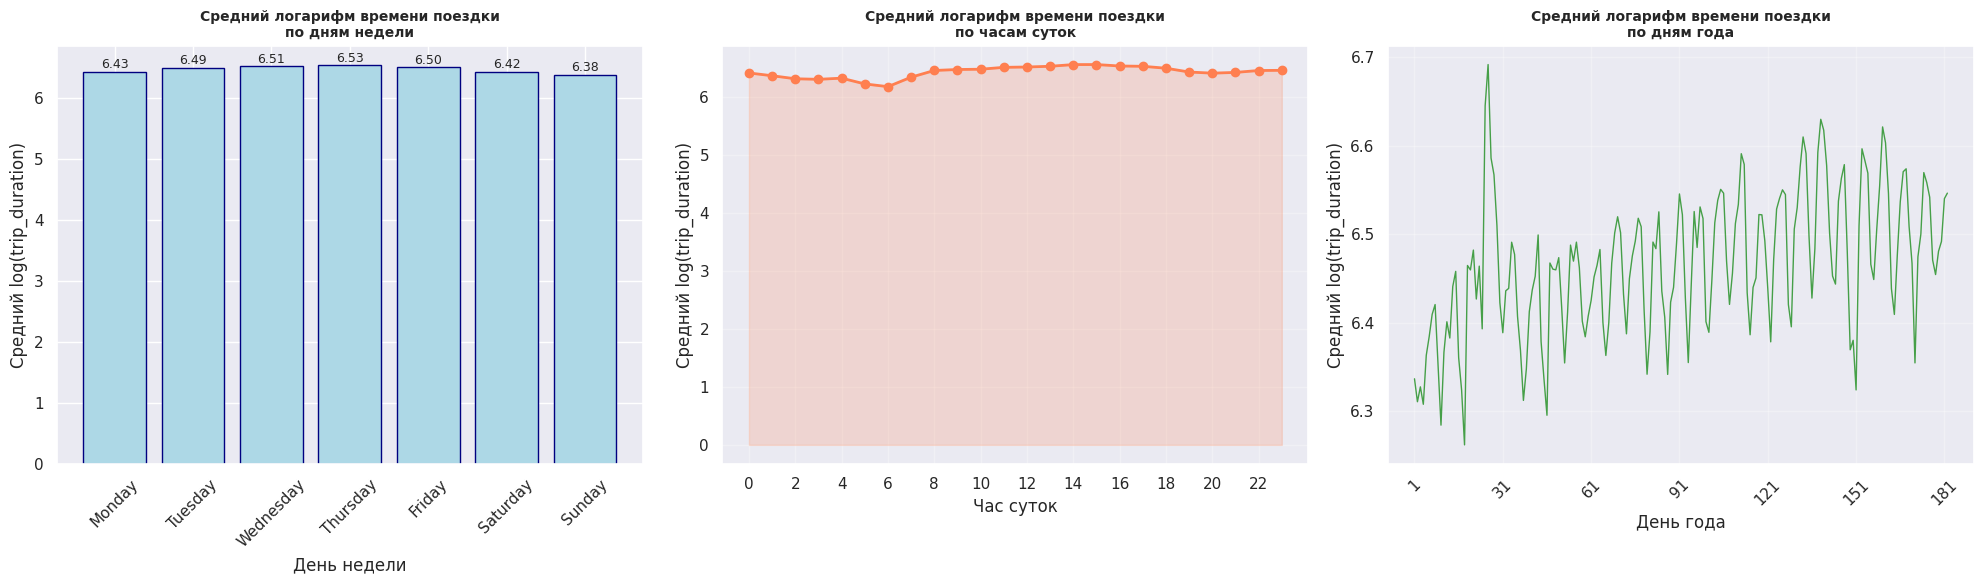

In [23]:
# Копия обучающей выборки с целевой переменной
train_data = X_train.copy()
train_data['log_trip_duration'] = y_train

# График зависимости среднего логарифма времени поездки от дня недели
plt.figure(figsize=(20, 6))

train_data['day_of_week'] = train_data['pickup_datetime'].dt.day_name()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_week_means = (train_data.groupby('day_of_week')['log_trip_duration'].mean().reindex(days_order))

plt.subplot(1, 3, 1)
bars = plt.bar(day_week_means.index, day_week_means.values, color='lightblue', edgecolor='navy')
plt.title('Средний логарифм времени поездки\nпо дням недели', fontsize=10, fontweight='bold')
plt.xlabel('День недели')
plt.ylabel('Средний log(trip_duration)')
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# График зависимости от часа в сутках
plt.subplot(1, 3, 2)
train_data['hour'] = train_data['pickup_datetime'].dt.hour
hour_means = train_data.groupby('hour')['log_trip_duration'].mean()

plt.plot(hour_means.index, hour_means.values, marker='o', linewidth=2, color='coral')
plt.fill_between(hour_means.index, hour_means.values, alpha=0.2, color='coral')
plt.title('Средний логарифм времени поездки\nпо часам суток', fontsize=10, fontweight='bold')
plt.xlabel('Час суток')
plt.ylabel('Средний log(trip_duration)')
plt.xticks(range(0, 24, 2))
plt.grid(alpha=0.3)

# График зависимости от дня в году
plt.subplot(1, 3, 3)
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
day_year_means = train_data.groupby('day_of_year')['log_trip_duration'].mean()

plt.plot(day_year_means.index, day_year_means.values, linewidth=1, color='green', alpha=0.7)
plt.title('Средний логарифм времени поездки\nпо дням года', fontsize=10, fontweight='bold')
plt.xlabel('День года')
plt.ylabel('Средний log(trip_duration)')

# Метки каждые 30 дней для дней года
days = day_year_means.index
plt.xticks(ticks=days[::30], labels=days[::30], rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Графики зависимости таргета (средней длительности поездок) и количества поездок принципиально различаются. Количество поездок отражает спрос на такси с пиками в часы наибольшей активности, тогда как длительность поездок зависит от дорожной ситуации и характера маршрутов.

В периоды аномально высокого спроса (часы пик) средняя длительность поездок сокращается. Это объясняется тем, что в условиях пробок пассажиры выбирают более короткие маршруты, а также преобладают стандартные поездки на работу и обратно фиксированной продолжительности.

На графике зависимости от дня года наблюдается слабый сезонный тренд: летом поездки немного длиннее из-за туристических маршрутов, зимой - короче из-за сложных погодных условий. Однако основное влияние на длительность оказывают время суток и день недели, а не сезонные факторы.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# День недели, месяц, час я уже добавил раннее

X_train['is_anomaly'] = 0
X_train.loc[X_train['pickup_datetime'].dt.date.isin(X_train['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_anomaly'] = 1

X_train['day_of_year'] = X_train['pickup_datetime'].dt.dayofyear

X_test['is_anomaly'] = 0
X_test.loc[X_test['pickup_datetime'].dt.date.isin(X_test['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_anomaly'] = 1

X_test['day_of_year'] = X_test['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ:** Номер дня в году будем счиать численным признаком. Месяц будем считать категориальным (так как к примеру нельзя будет сказать, что ноябрь меньше декабря). День недели будем считать категориальным, так как их тоже нельзя сравнивать. Час будем считать категориальным признаком, потому что сравнить адекватно не получится, т.к. на это влияет еще фактор какой час произошел раньше.

**Задание 5**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [25]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_5 = X_train[['hour', 'day_of_year', 'day_of_week','month','is_anomaly']]
test_5 = X_test[['hour', 'day_of_year', 'day_of_week','month','is_anomaly']]

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

categorical_features = ['hour', 'day_of_week', 'month', 'is_anomaly']
numerical_features = ['day_of_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Ridge-регрессия с параметрами по умолчанию
])

model = pipeline.fit(train_5, y_train)

y_train_pred = model.predict(train_5)
y_test_pred = model.predict(test_5)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Результаты Ridge-регрессии:\n")
print("=" * 80)
print(f"Train RMSE = {train_rmse:.4f}")
print(f"Train MSE = {train_mse:.4f}")
print(f"Test RMSE = {test_rmse:.4f}")
print(f"Test MSE = {test_mse:.4f}")
print("=" * 80)
print("\nИнформация о признаках:")
print(f"Категориальные признаки: {categorical_features}")
print(f"Численные признаки: {numerical_features}")
print(f"Размер обучающей выборки: {train_5.shape}")
print(f"Размер тестовой выборки: {test_5.shape}")

Результаты Ridge-регрессии:

Train RMSE = 0.7892
Train MSE = 0.6228
Test RMSE = 0.7883
Test MSE = 0.6213

Информация о признаках:
Категориальные признаки: ['hour', 'day_of_week', 'month', 'is_anomaly']
Численные признаки: ['day_of_year']
Размер обучающей выборки: (1021050, 5)
Размер тестовой выборки: (437594, 5)


## Часть 2. Изучаем координаты
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [27]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [28]:
show_circles_on_map(df_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [29]:
show_circles_on_map(df_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?
**Ответ:** Явно на карте выделяются национальный аэропорт имени Джона Кеннеди и аэропорт Ла-Гуардия. Эти локации будут интересны для нашей задачи тем, что там постоянный трафик, он круглосуточный, будет интересно его проанализировать.

**Задание 6**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [30]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['log_haversine'] = np.log1p(haversine_array(X_train.pickup_longitude, X_train.pickup_latitude, X_train.dropoff_longitude, X_train.dropoff_latitude))
X_train['haversine'] = haversine_array(X_train.pickup_longitude, X_train.pickup_latitude, X_train.dropoff_longitude, X_train.dropoff_latitude)

X_test['log_haversine'] = np.log1p(haversine_array(X_test.pickup_longitude, X_test.pickup_latitude, X_test.dropoff_longitude, X_test.dropoff_latitude))
X_test['haversine'] = haversine_array(X_test.pickup_longitude, X_test.pickup_latitude, X_test.dropoff_longitude, X_test.dropoff_latitude)

In [32]:
df_train['haversine'] = haversine_array(df_train.pickup_longitude, df_train.pickup_latitude, df_train.dropoff_longitude, df_train.dropoff_latitude)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [33]:
your_df = pd.DataFrame({'log_trip_duration': y_train, 'haversine': X_train['haversine'], 'log_haversine': X_train['log_haversine']})
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

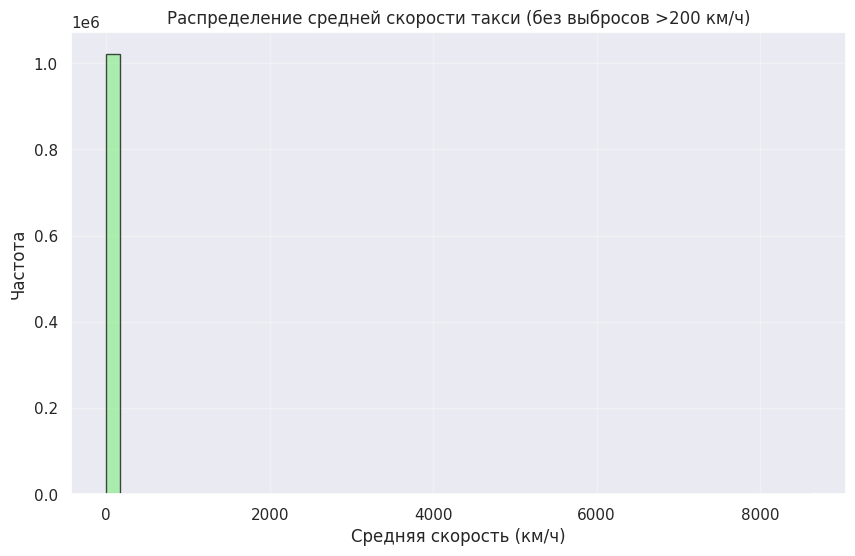

Статистика средней скорости такси:
Мин. скорость: 0.00 км/ч
Макс. скорость: 8619.13 км/ч
Медиана скорости: 9.60 км/ч
Средняя скорость: 11.40 км/ч


In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# speed = distance / time, где distance в км, time в часах
your_df['avg_speed'] = your_df['haversine'] / (df_train.loc[your_df.index, 'trip_duration'] / 3600)

plt.figure(figsize=(10, 6))
plt.hist(your_df['avg_speed'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.title('Распределение средней скорости такси (без выбросов >200 км/ч)')
plt.grid(alpha=0.3)
plt.show()

# Статистика скорости
print("Статистика средней скорости такси:")
print(f"Мин. скорость: {your_df['avg_speed'].min():.2f} км/ч")
print(f"Макс. скорость: {your_df['avg_speed'].max():.2f} км/ч")
print(f"Медиана скорости: {your_df['avg_speed'].median():.2f} км/ч")
print(f"Средняя скорость: {your_df['avg_speed'].mean():.2f} км/ч")

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

95% перцентиль скорости: 26.99 км/ч
99% перцентиль скорости: 40.96 км/ч


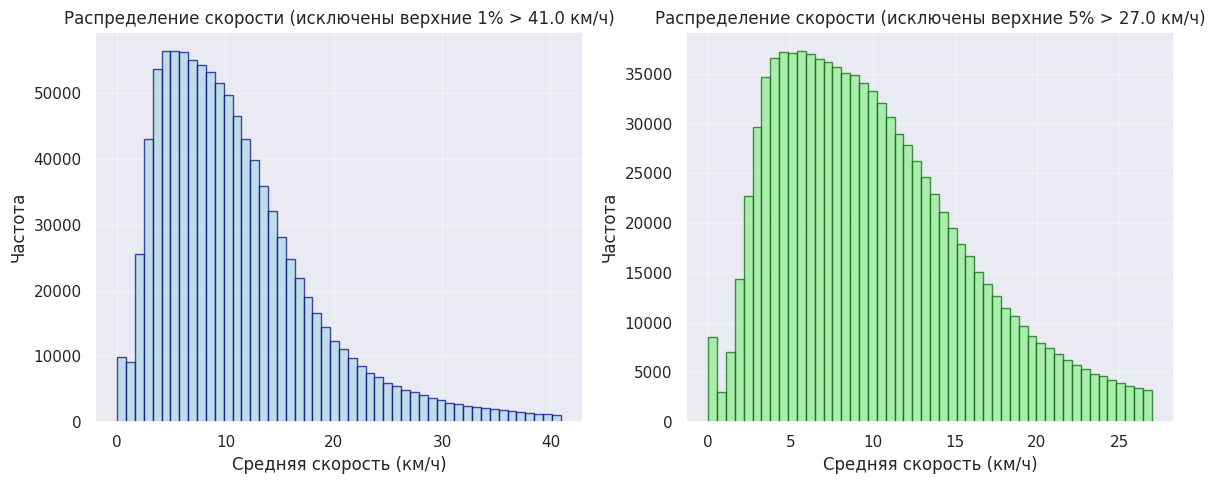


Статистика для разумных скоростей (исключены верхние 1%):
Количество поездок: 1010839 из 1021050 (99.0%)
Мин. скорость: 0.00 км/ч
Макс. скорость: 40.96 км/ч
Медиана скорости: 9.52 км/ч
Средняя скорость: 10.99 км/ч
Статистика для разумных скоростей (исключены верхние 5%):
Количество поездок: 969997 из 1021050 (95.0%)
Мин. скорость: 0.00 км/ч
Макс. скорость: 26.99 км/ч
Медиана скорости: 9.20 км/ч
Средняя скорость: 10.09 км/ч


In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# Исключаем верхние 1% самых высоких скоростей как выбросы
speed_99_percentile = your_df['avg_speed'].quantile(0.99)
speed_95_percentile = your_df['avg_speed'].quantile(0.95)

print(f"95% перцентиль скорости: {speed_95_percentile:.2f} км/ч")
print(f"99% перцентиль скорости: {speed_99_percentile:.2f} км/ч")

# Создаем DataFrame с разумными значениями скорости (исключаем верхние 1%)
reasonable_speeds_df = your_df[your_df['avg_speed'] <= speed_99_percentile]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(reasonable_speeds_df['avg_speed'], bins=50, alpha=0.7, color='lightblue', edgecolor='navy')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.title(f'Распределение скорости (исключены верхние 1% > {speed_99_percentile:.1f} км/ч)')
plt.grid(alpha=0.3)

# Исключаем верхние 5%
very_reasonable_speeds_df = your_df[your_df['avg_speed'] <= speed_95_percentile]

plt.subplot(1, 2, 2)
plt.hist(very_reasonable_speeds_df['avg_speed'], bins=50, alpha=0.7, color='lightgreen', edgecolor='darkgreen')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.title(f'Распределение скорости (исключены верхние 5% > {speed_95_percentile:.1f} км/ч)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика для разумных скоростей
print("\nСтатистика для разумных скоростей (исключены верхние 1%):")
print(f"Количество поездок: {len(reasonable_speeds_df)} из {len(your_df)} ({len(reasonable_speeds_df)/len(your_df)*100:.1f}%)")
print(f"Мин. скорость: {reasonable_speeds_df['avg_speed'].min():.2f} км/ч")
print(f"Макс. скорость: {reasonable_speeds_df['avg_speed'].max():.2f} км/ч")
print(f"Медиана скорости: {reasonable_speeds_df['avg_speed'].median():.2f} км/ч")
print(f"Средняя скорость: {reasonable_speeds_df['avg_speed'].mean():.2f} км/ч")
print("="*80)
print("Статистика для разумных скоростей (исключены верхние 5%):")
print(f"Количество поездок: {len(very_reasonable_speeds_df)} из {len(your_df)} ({len(very_reasonable_speeds_df)/len(your_df)*100:.1f}%)")
print(f"Мин. скорость: {very_reasonable_speeds_df['avg_speed'].min():.2f} км/ч")
print(f"Макс. скорость: {very_reasonable_speeds_df['avg_speed'].max():.2f} км/ч")
print(f"Медиана скорости: {very_reasonable_speeds_df['avg_speed'].median():.2f} км/ч")
print(f"Средняя скорость: {very_reasonable_speeds_df['avg_speed'].mean():.2f} км/ч")

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

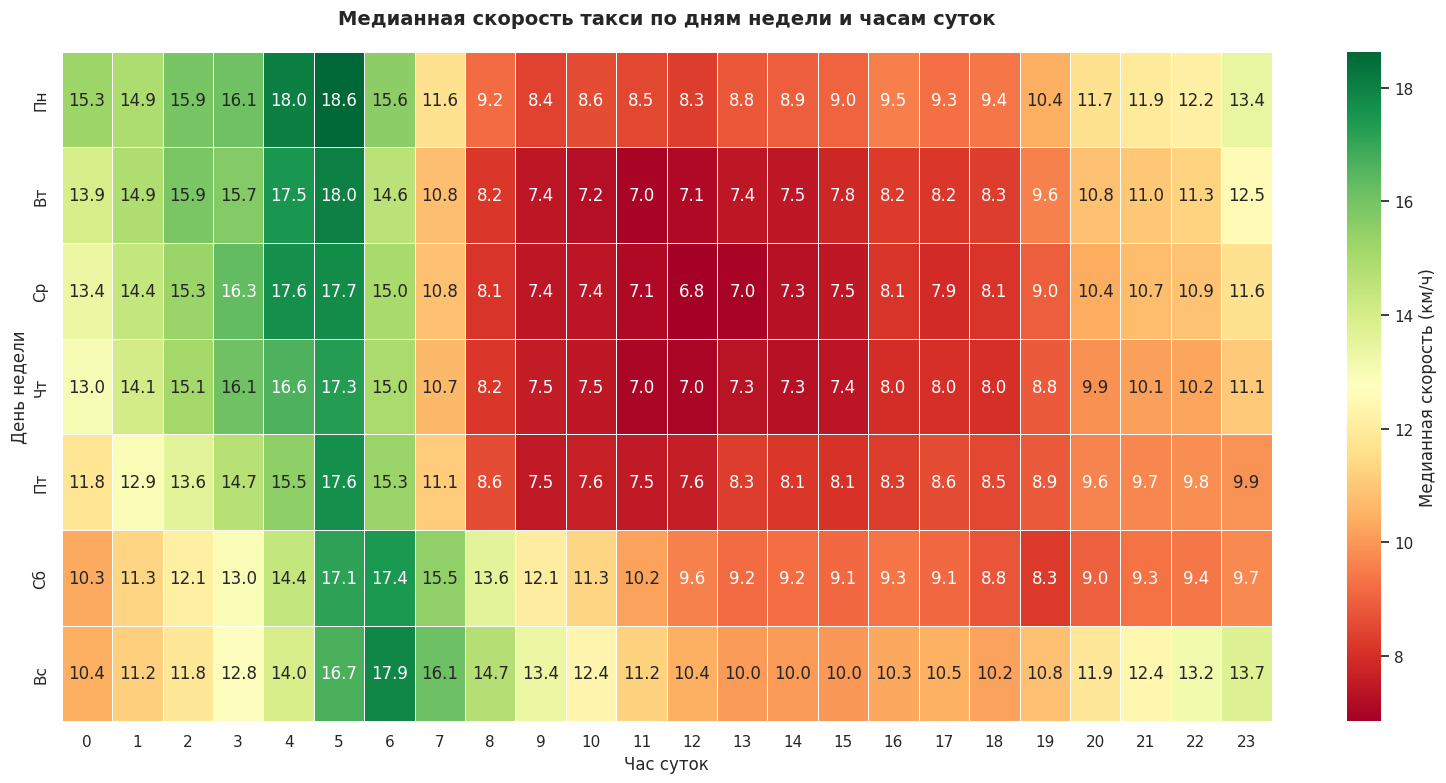

Статистика медианных скоростей:
Общая медианная скорость: 9.52 км/ч
Самый быстрый период: 18.6 км/ч
Самый быстрый период: Пн 5:00
Самый медленный период: 6.8 км/ч
Самый медленный период: Ср 12:00


In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

your_df['day_of_week'] = df_train.loc[your_df.index, 'pickup_datetime'].dt.dayofweek
your_df['hour'] = df_train.loc[your_df.index, 'pickup_datetime'].dt.hour

# Исключаем аномальные скорости (используем 99% перцентиль)
speed_99_percentile = your_df['avg_speed'].quantile(0.99)
reasonable_speeds_df = your_df[your_df['avg_speed'] <= speed_99_percentile]

# Группируем по дню недели и часу для подсчета медианной скорости
speed_heatmap_data = reasonable_speeds_df.groupby(['day_of_week', 'hour'])['avg_speed'].median().reset_index()

# Преобразуем в матрицу для heatmap
heatmap_matrix = speed_heatmap_data.pivot(index='day_of_week', columns='hour', values='avg_speed')

# Подписи для дней недели
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
heatmap_matrix.index = [day_names[i] for i in heatmap_matrix.index]

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_matrix, annot=True, fmt='.1f', cmap='RdYlGn', cbar_kws={'label': 'Медианная скорость (км/ч)'}, linewidths=0.5, linecolor='white')

plt.title('Медианная скорость такси по дням недели и часам суток', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Час суток', fontsize=12)
plt.ylabel('День недели', fontsize=12)
plt.tight_layout()
plt.show()

print("Статистика медианных скоростей:")
print(f"Общая медианная скорость: {reasonable_speeds_df['avg_speed'].median():.2f} км/ч")

print(f"Самый быстрый период: {heatmap_matrix.max().max():.1f} км/ч")
max_speed_idx = np.unravel_index(heatmap_matrix.values.argmax(), heatmap_matrix.shape)
print(f"Самый быстрый период: {heatmap_matrix.index[max_speed_idx[0]]} {heatmap_matrix.columns[max_speed_idx[1]]}:00")

print(f"Самый медленный период: {heatmap_matrix.min().min():.1f} км/ч")
min_speed_idx = np.unravel_index(heatmap_matrix.values.argmin(), heatmap_matrix.shape)
print(f"Самый медленный период: {heatmap_matrix.index[min_speed_idx[0]]} {heatmap_matrix.columns[min_speed_idx[1]]}:00")

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Значение скорости нельзя использовать во время обучения, потому что это приводит к утечке данных.

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Проверка столбцов до удаления скорости:")
print("X_train columns:", X_train.columns.tolist())
print("X_test columns:", X_test.columns.tolist())
print("your_df columns:", your_df.columns.tolist())

if 'avg_speed' in your_df.columns:
    your_df = your_df.drop(columns=['avg_speed'])
print("\nПроверка столбцов после удаления скорости:")
print("your_df columns:", your_df.columns.tolist())

Проверка столбцов до удаления скорости:
X_train columns: ['id', 'vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'day_of_year', 'hour', 'month', 'day_of_week', 'is_anomaly', 'log_haversine', 'haversine']
X_test columns: ['id', 'vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'day_of_year', 'hour', 'month', 'day_of_week', 'is_anomaly', 'log_haversine', 'haversine']
your_df columns: ['log_trip_duration', 'haversine', 'log_haversine', 'avg_speed', 'day_of_week', 'hour']

Проверка столбцов после удаления скорости:
your_df columns: ['log_trip_duration', 'haversine', 'log_haversine', 'day_of_week', 'hour']


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Согласно анализу тепловой карты скоростей, минимальная скорость движения такси наблюдается в рабочие дни с понедельника по пятницу в часы пик - с 8 до 20, причем абсолютный минимум приходится на среду в 12 часов. Максимальная скорость достигается в ночное время с 0 до 7 часов утра в течение всей недели, а также в утренние часы выходных дней с 4 до 12 дня, когда дороги наиболее свободны.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [38]:
X_train['day_of_week']

1011257      Tuesday
178550        Friday
551460        Sunday
1434271       Sunday
1173610     Thursday
             ...    
259178        Friday
1414414      Tuesday
131932       Tuesday
671155       Tuesday
121958     Wednesday
Name: day_of_week, Length: 1021050, dtype: object

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
day_to_num = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
X_train['day_of_week_num'] = X_train['day_of_week'].map(day_to_num)
X_test['day_of_week_num'] = X_test['day_of_week'].map(day_to_num)

# Периоды пробок (на основе типичных городских паттернов, т.к. от скорости мы не опираемся)
X_train['is_traffic_jam'] = ((X_train['day_of_week_num'] <= 4) &  ((X_train['hour'] >= 7) & (X_train['hour'] <= 10) |  (X_train['hour'] >= 16) & (X_train['hour'] <= 19)))  # Пн-Пт, Утро 7-10, Вечер 16-19

# Периоды свободных дорог
X_train['is_free_road'] = ((X_train['hour'] >= 0) & (X_train['hour'] <= 6)) | ((X_train['day_of_week_num'] >= 5) & (X_train['hour'] >= 8) & (X_train['hour'] <= 12))  # Ночь 0-6, Выходные утро 8-12

X_train['is_traffic_jam'] = X_train['is_traffic_jam'].astype(int)
X_train['is_free_road'] = X_train['is_free_road'].astype(int)

# То же самое для тестовой выборки
X_test['is_traffic_jam'] = ((X_test['day_of_week_num'] <= 4) &
                           ((X_test['hour'] >= 7) & (X_test['hour'] <= 10) |
                            (X_test['hour'] >= 16) & (X_test['hour'] <= 19))).astype(int)

X_test['is_free_road'] = (((X_test['hour'] >= 0) & (X_test['hour'] <= 6)) |
                         ((X_test['day_of_week_num'] >= 5) & (X_test['hour'] >= 8) & (X_test['hour'] <= 12))).astype(int)

print(f"Поездок в период пробок (обучение): {X_train['is_traffic_jam'].sum()}")
print(f"Поездок в период свободных дорог (обучение): {X_train['is_free_road'].sum()}")
print(f"Поездок в период пробок (тест): {X_test['is_traffic_jam'].sum()}")
print(f"Поездок в период свободных дорог (тест): {X_test['is_free_road'].sum()}")

Поездок в период пробок (обучение): 308017
Поездок в период свободных дорог (обучение): 202616
Поездок в период пробок (тест): 131838
Поездок в период свободных дорог (тест): 86501


**Задание 8**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['airport_start'] = 0
X_train['airport_finish'] = 0

X_test['airport_start'] = 0
X_test['airport_finish'] = 0

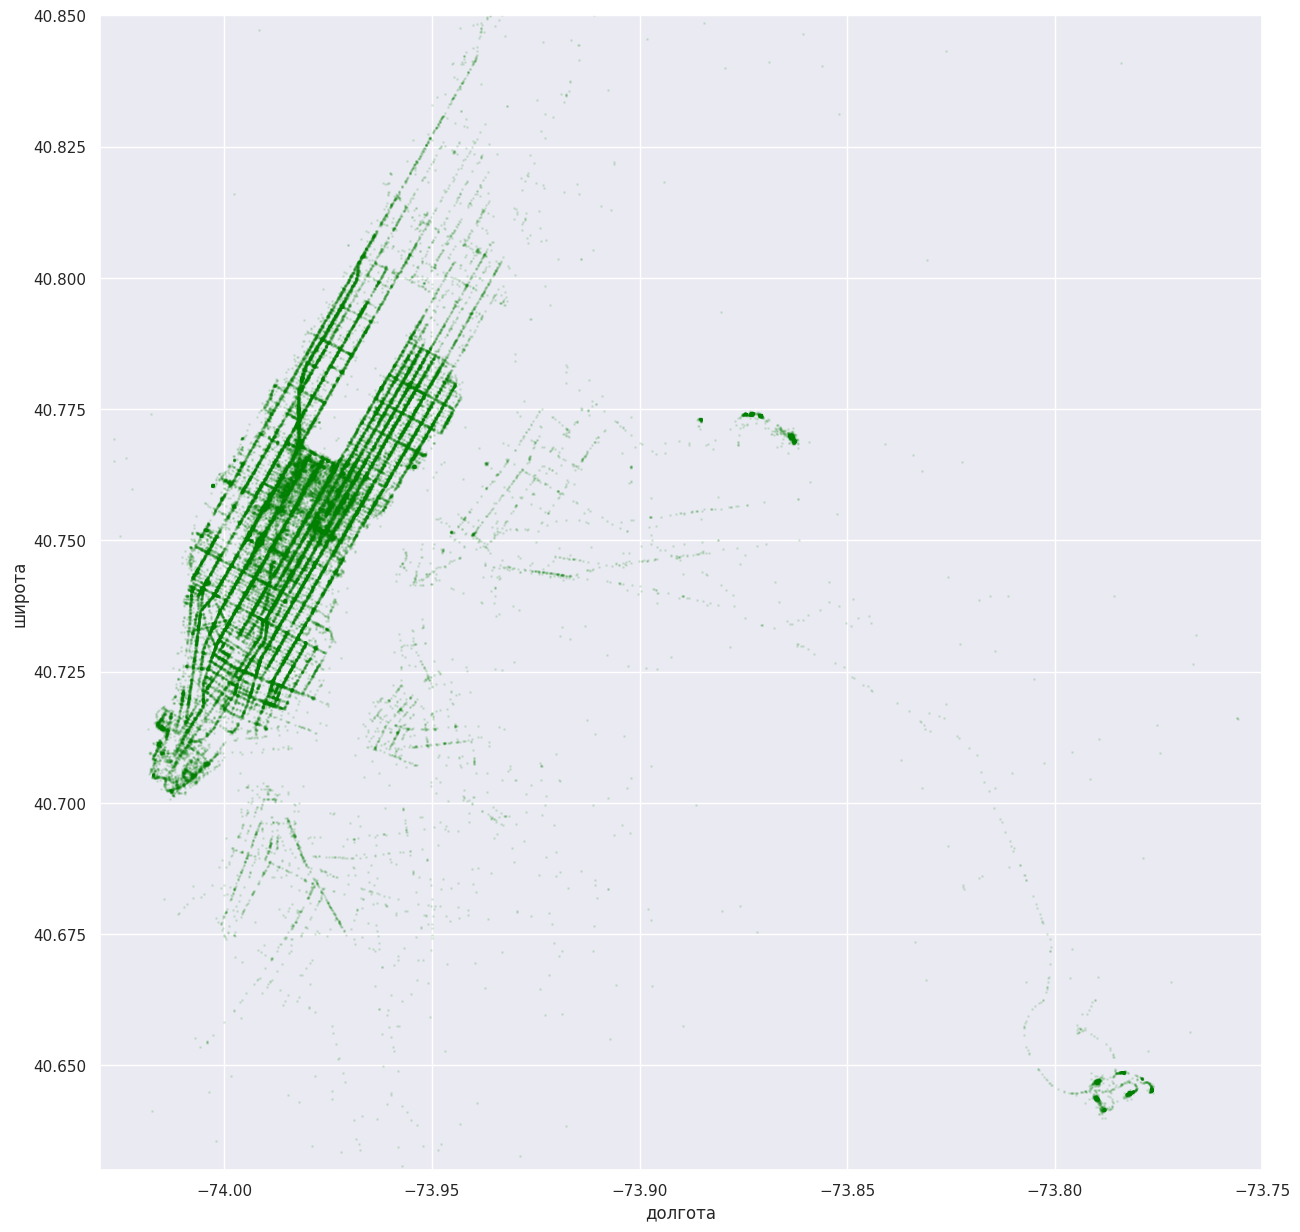

In [41]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(X_train['pickup_longitude'].values[:N], X_train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('широта')
plt.xlabel('долгота')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

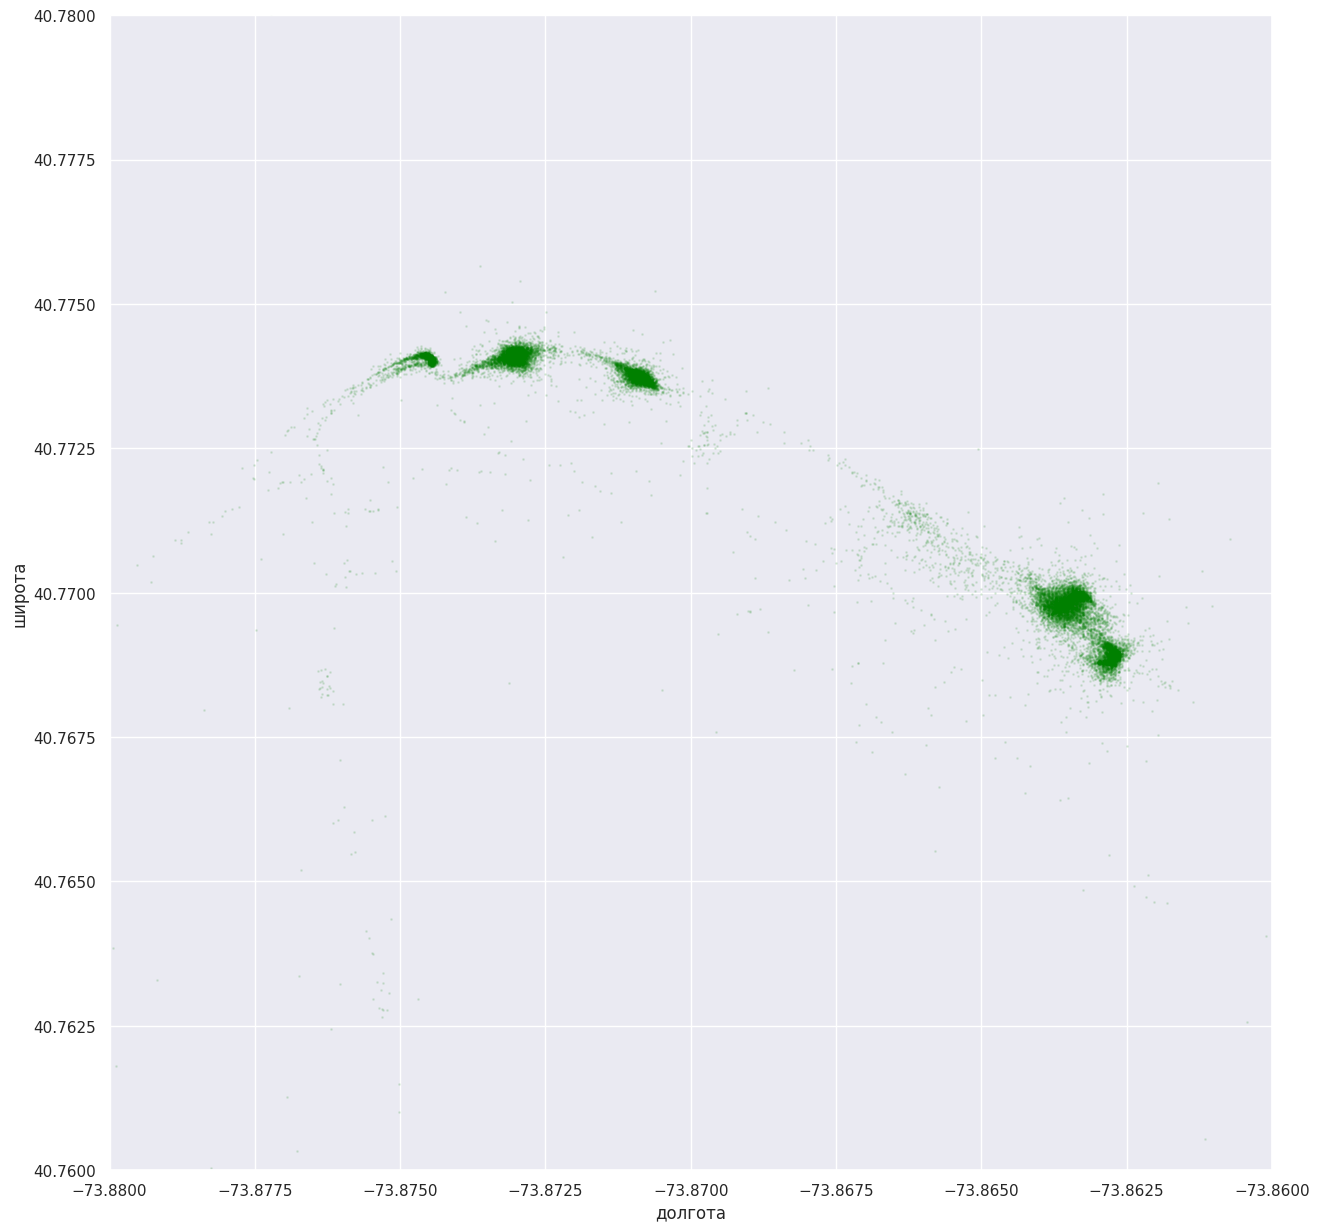

In [42]:
# 1й аэропорт
N = 1000000
city_long_border = (-73.88, -73.86)
city_lat_border = (40.76, 40.78)

plt.figure(figsize=(15,15))
plt.scatter(X_train['pickup_longitude'].values[:N], X_train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('широта')
plt.xlabel('долгота')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

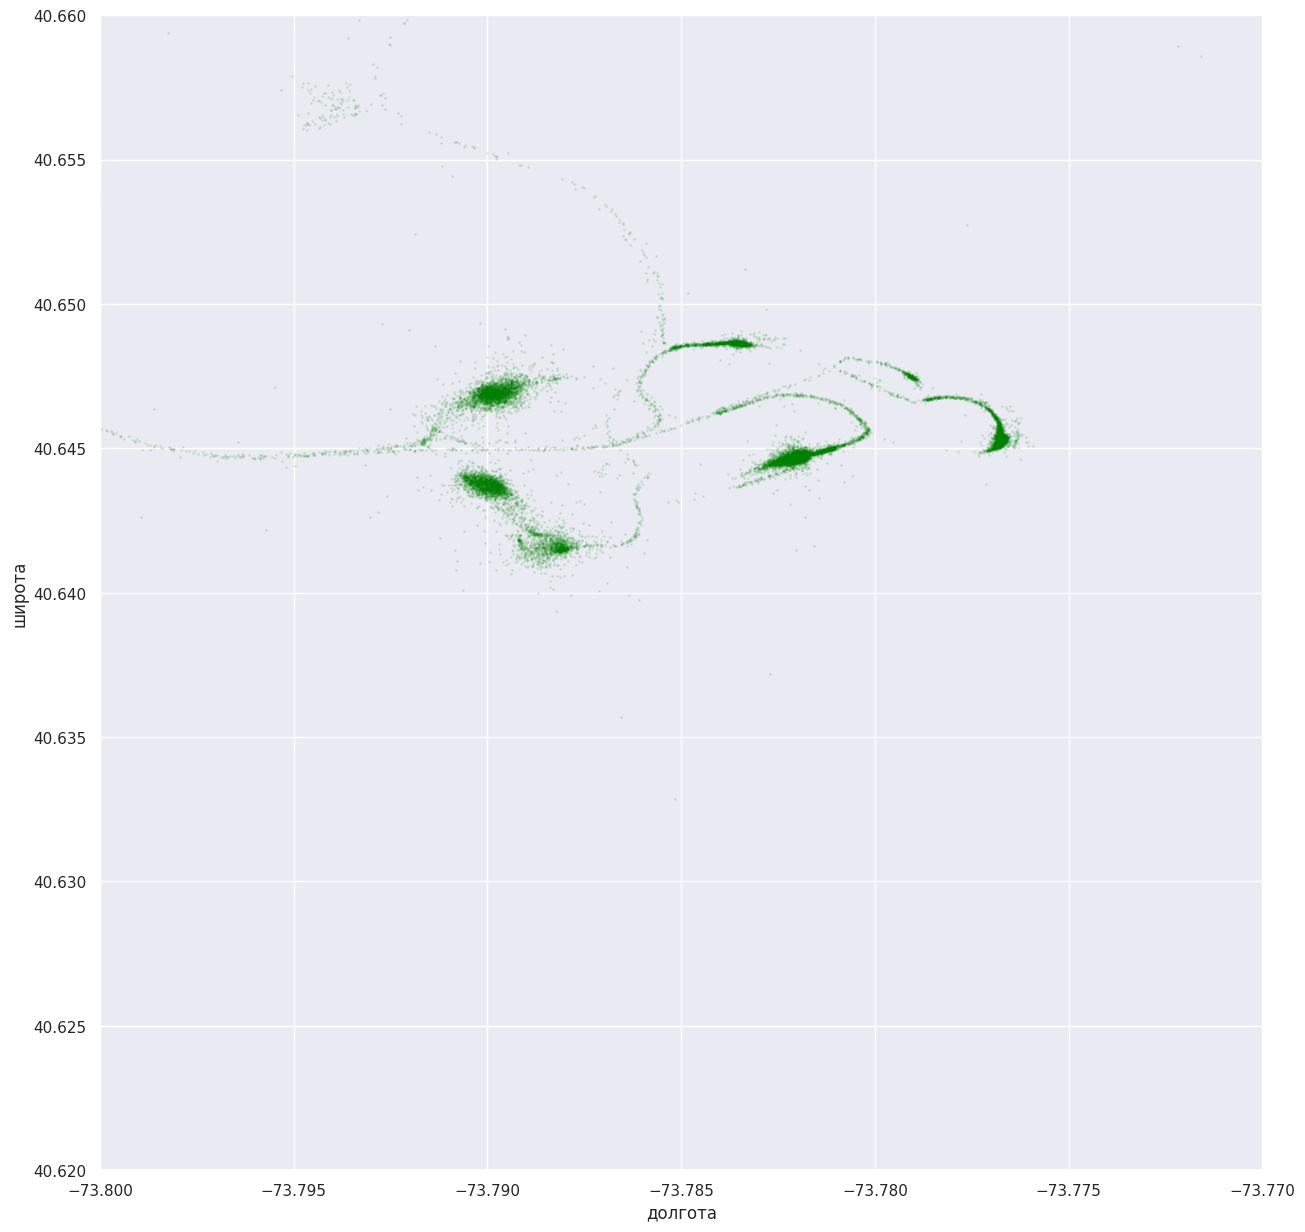

In [43]:
# 2й аэропорт
N = 1000000
city_long_border = (-73.8, -73.77)
city_lat_border = (40.62, 40.66)

plt.figure(figsize=(15,15))
plt.scatter(X_train['pickup_longitude'].values[:N], X_train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('широта')
plt.xlabel('долгота')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [44]:
# 1й аэропорт (LaGuardia)
lga_bounds = {
    'min_lon': -73.88, 'max_lon': -73.86,
    'min_lat': 40.76, 'max_lat': 40.78
}

# 2й аэропорт (JFK)
jfk_bounds = {
    'min_lon': -73.8, 'max_lon': -73.77,
    'min_lat': 40.62, 'max_lat': 40.66
}

# LaGuardia Airport
X_train['start_lga'] = ((X_train['pickup_longitude'] >= lga_bounds['min_lon']) &
                       (X_train['pickup_longitude'] <= lga_bounds['max_lon']) &
                       (X_train['pickup_latitude'] >= lga_bounds['min_lat']) &
                       (X_train['pickup_latitude'] <= lga_bounds['max_lat'])).astype(int)

X_train['end_lga'] = ((X_train['dropoff_longitude'] >= lga_bounds['min_lon']) &
                     (X_train['dropoff_longitude'] <= lga_bounds['max_lon']) &
                     (X_train['dropoff_latitude'] >= lga_bounds['min_lat']) &
                     (X_train['dropoff_latitude'] <= lga_bounds['max_lat'])).astype(int)

# JFK Airport
X_train['start_jfk'] = ((X_train['pickup_longitude'] >= jfk_bounds['min_lon']) &
                       (X_train['pickup_longitude'] <= jfk_bounds['max_lon']) &
                       (X_train['pickup_latitude'] >= jfk_bounds['min_lat']) &
                       (X_train['pickup_latitude'] <= jfk_bounds['max_lat'])).astype(int)

X_train['end_jfk'] = ((X_train['dropoff_longitude'] >= jfk_bounds['min_lon']) &
                     (X_train['dropoff_longitude'] <= jfk_bounds['max_lon']) &
                     (X_train['dropoff_latitude'] >= jfk_bounds['min_lat']) &
                     (X_train['dropoff_latitude'] <= jfk_bounds['max_lat'])).astype(int)

X_test['start_lga'] = ((X_test['pickup_longitude'] >= lga_bounds['min_lon']) &
                      (X_test['pickup_longitude'] <= lga_bounds['max_lon']) &
                      (X_test['pickup_latitude'] >= lga_bounds['min_lat']) &
                      (X_test['pickup_latitude'] <= lga_bounds['max_lat'])).astype(int)

X_test['end_lga'] = ((X_test['dropoff_longitude'] >= lga_bounds['min_lon']) &
                    (X_test['dropoff_longitude'] <= lga_bounds['max_lon']) &
                    (X_test['dropoff_latitude'] >= lga_bounds['min_lat']) &
                    (X_test['dropoff_latitude'] <= lga_bounds['max_lat'])).astype(int)

X_test['start_jfk'] = ((X_test['pickup_longitude'] >= jfk_bounds['min_lon']) &
                      (X_test['pickup_longitude'] <= jfk_bounds['max_lon']) &
                      (X_test['pickup_latitude'] >= jfk_bounds['min_lat']) &
                      (X_test['pickup_latitude'] <= jfk_bounds['max_lat'])).astype(int)

X_test['end_jfk'] = ((X_test['dropoff_longitude'] >= jfk_bounds['min_lon']) &
                    (X_test['dropoff_longitude'] <= jfk_bounds['max_lon']) &
                    (X_test['dropoff_latitude'] >= jfk_bounds['min_lat']) &
                    (X_test['dropoff_latitude'] <= jfk_bounds['max_lat'])).astype(int)

print("Статистика по аэропортам (обучающая выборка):")
print(f"Поездок, начинающихся в LaGuardia: {X_train['start_lga'].sum()}")
print(f"Поездок, заканчивающихся в LaGuardia: {X_train['end_lga'].sum()}")
print(f"Поездок, начинающихся в JFK: {X_train['start_jfk'].sum()}")
print(f"Поездок, заканчивающихся в JFK: {X_train['end_jfk'].sum()}")

print("\nСтатистика по аэропортам (тестовая выборка):")
print(f"Поездок, начинающихся в LaGuardia: {X_test['start_lga'].sum()}")
print(f"Поездок, заканчивающихся в LaGuardia: {X_test['end_lga'].sum()}")
print(f"Поездок, начинающихся в JFK: {X_test['start_jfk'].sum()}")
print(f"Поездок, заканчивающихся в JFK: {X_test['end_jfk'].sum()}")

Статистика по аэропортам (обучающая выборка):
Поездок, начинающихся в LaGuardia: 24964
Поездок, заканчивающихся в LaGuardia: 12250
Поездок, начинающихся в JFK: 22107
Поездок, заканчивающихся в JFK: 8509

Статистика по аэропортам (тестовая выборка):
Поездок, начинающихся в LaGuardia: 10699
Поездок, заканчивающихся в LaGuardia: 5257
Поездок, начинающихся в JFK: 9469
Поездок, заканчивающихся в JFK: 3608


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

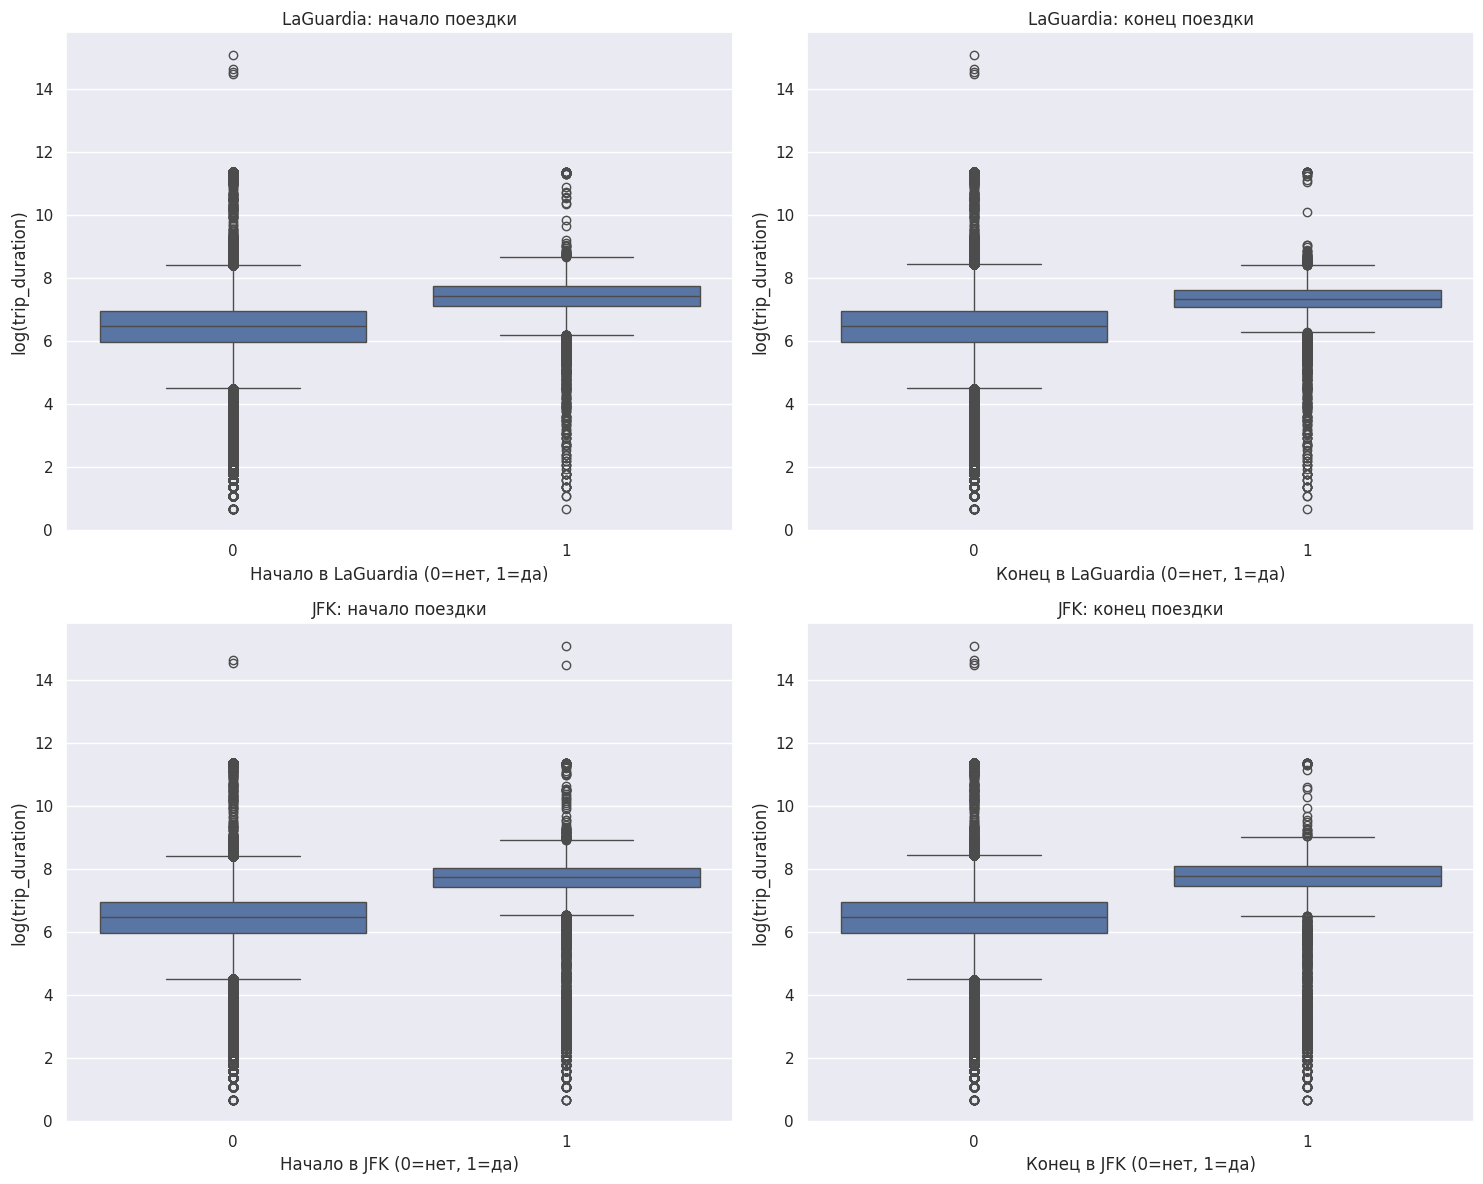

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

plot_data = X_train.copy()
plot_data['log_trip_duration'] = y_train

# LaGuardia - начало поездки
sns.boxplot(data=plot_data, x='start_lga', y='log_trip_duration', ax=axes[0,0])
axes[0,0].set_title('LaGuardia: начало поездки')
axes[0,0].set_xlabel('Начало в LaGuardia (0=нет, 1=да)')
axes[0,0].set_ylabel('log(trip_duration)')

# LaGuardia - конец поездки
sns.boxplot(data=plot_data, x='end_lga', y='log_trip_duration', ax=axes[0,1])
axes[0,1].set_title('LaGuardia: конец поездки')
axes[0,1].set_xlabel('Конец в LaGuardia (0=нет, 1=да)')
axes[0,1].set_ylabel('log(trip_duration)')

# JFK - начало поездки
sns.boxplot(data=plot_data, x='start_jfk', y='log_trip_duration', ax=axes[1,0])
axes[1,0].set_title('JFK: начало поездки')
axes[1,0].set_xlabel('Начало в JFK (0=нет, 1=да)')
axes[1,0].set_ylabel('log(trip_duration)')

# JFK - конец поездки
sns.boxplot(data=plot_data, x='end_jfk', y='log_trip_duration', ax=axes[1,1])
axes[1,1].set_title('JFK: конец поездки')
axes[1,1].set_xlabel('Конец в JFK (0=нет, 1=да)')
axes[1,1].set_ylabel('log(trip_duration)')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Признаки оказались исключительно качественными, поскольку демонстрируют ярко выраженное разделение распределений длительности поездок между аэропортами и остальными локациями. Для LaGuardia наблюдается четкая закономерность: поездки из аэропорта существенно короче, а в аэропорт - значительно длиннее, что отражает его близость к городу. В случае с JFK, расположенным дальше от центра, поездки в аэропорт заметно продолжительнее среднего. Минимальное пересечение интерквартильных диапазонов подтверждает высокую предсказательную силу этих признаков

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import folium

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=4, n_cols=3):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lon_min = None
        self.lon_max = None
        self.lat_min = None
        self.lat_max = None
        self.lon_step = None
        self.lat_step = None

    def _get_cell_id(self, lon, lat):
        # Проверка, попадают ли координаты в область
        in_area = ((lon >= self.lon_min) & (lon <= self.lon_max) &
                  (lat >= self.lat_min) & (lat <= self.lat_max))

        # Индексы столбцов и строк
        col_idx = ((lon - self.lon_min) / self.lon_step).astype(int)
        row_idx = ((lat - self.lat_min) / self.lat_step).astype(int)

        # Ограничиваем индексы диапазоном
        col_idx = np.clip(col_idx, 0, self.n_cols - 1)
        row_idx = np.clip(row_idx, 0, self.n_rows - 1)

        # Номер ячейки
        cell_id = row_idx * self.n_cols + col_idx

        # Для точек вне области устанавливаем -1
        cell_id = np.where(in_area, cell_id, -1)

        return cell_id

    def show_map(self, X, sample_size=1000):
        # Центр области для карты
        center_lat = (self.lat_min + self.lat_max) / 2
        center_lon = (self.lon_min + self.lon_max) / 2

        m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

        folium.Rectangle(
            bounds=[[self.lat_min, self.lon_min], [self.lat_max, self.lon_max]],
            color='red',
            fill=False,
            weight=5,
            opacity=1,
            popup=f'Область разбиения: {self.n_rows}×{self.n_cols} ячеек'
        ).add_to(m)

        for i in range(1, self.n_rows):
            lat = self.lat_min + i * self.lat_step
            folium.PolyLine(
                locations=[[lat, self.lon_min], [lat, self.lon_max]],
                color='red',
                weight=3.5,
                opacity=0.6
            ).add_to(m)

        for j in range(1, self.n_cols):
            lon = self.lon_min + j * self.lon_step
            folium.PolyLine(
                locations=[[self.lat_min, lon], [self.lat_max, lon]],
                color='red',
                weight=3.5,
                opacity=0.6
            ).add_to(m)

        # Центры ячеек с номерами
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                center_lat = self.lat_min + (i + 0.5) * self.lat_step
                center_lon = self.lon_min + (j + 0.5) * self.lon_step
                cell_id = i * self.n_cols + j

                folium.CircleMarker(
                    location=[center_lat, center_lon],
                    radius=8,
                    color='red',
                    fill=True,
                    fill_color='red',
                    fill_opacity=0.7,
                    popup=f'Ячейка {cell_id} (строка {i}, столбец {j})'
                ).add_to(m)

                # Цифра с номером ячейки
                folium.map.Marker(
                    [center_lat, center_lon],
                    icon=folium.DivIcon(
                        html=f'<div style="font-size: 10pt; color: white; font-weight: bold;">{cell_id}</div>'
                    )
                ).add_to(m)

        sample = X.sample(min(sample_size, len(X)))
        for idx, row in sample.iterrows():
            folium.CircleMarker(
                location=[row['pickup_latitude'], row['pickup_longitude']],
                radius=2,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.5,
                popup=f'Поездка {idx}'
            ).add_to(m)

        return m

    def fit(self, X, y=None):
        # Границы, охватывающие основные скопления поездок
        self.lon_min = -74.03
        self.lon_max = -73.75
        self.lat_min = 40.63
        self.lat_max = 40.85

        # Вычисляем размер шага
        self.lon_step = (self.lon_max - self.lon_min) / self.n_cols
        self.lat_step = (self.lat_max - self.lat_min) / self.n_rows

        return self

    def transform(self, X, y=None):
        X = X.copy()

        # Номера ячеек для начала и окончания поездки
        X['pickup_cell_id'] = self._get_cell_id(
            X['pickup_longitude'].values,
            X['pickup_latitude'].values
        )

        X['dropoff_cell_id'] = self._get_cell_id(
            X['dropoff_longitude'].values,
            X['dropoff_latitude'].values
        )

        return X

In [47]:
grid_transformer = MapGridTransformer(n_rows=4, n_cols=3)

grid_transformer.fit(X_train)

X_train_grid = grid_transformer.transform(X_train)
X_test_grid = grid_transformer.transform(X_test)

X_train['grid_first'] = X_train_grid['pickup_cell_id']
X_train['grid_second'] = X_train_grid['dropoff_cell_id']

X_test['grid_first'] = X_test_grid['pickup_cell_id']
X_test['grid_second'] = X_test_grid['dropoff_cell_id']

m = grid_transformer.show_map(X_train, sample_size=500)
m

**Задание 10**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features = [
    'hour', 'day_of_week', 'month', 'is_anomaly',
    'is_traffic_jam', 'is_free_road',
    'start_lga', 'end_lga', 'start_jfk', 'end_jfk',
    'pickup_cell_id', 'dropoff_cell_id'
]

numerical_features = [
    'day_of_year', 'haversine', 'log_haversine'
]

available_categorical = [col for col in categorical_features if col in X_train_grid.columns]
available_numerical = [col for col in numerical_features if col in X_train_grid.columns]

print("Используемые категориальные признаки:", available_categorical)
print("Используемые численные признаки:", available_numerical)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), available_categorical),
        ('num', StandardScaler(), available_numerical)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))  # параметрамы по умолчанию
])

print("Обучение Ridge-регрессии...")
model = pipeline.fit(X_train_grid, y_train)

y_train_pred = model.predict(X_train_grid)
y_test_pred = model.predict(X_test_grid)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\n" + "="*60)
print("Результаты обучения Ridge-регрессии")
print("="*60)
print(f"Train RMSE = {train_rmse:.4f}")
print(f"Train MSE  = {train_mse:.4f}")
print(f"Test RMSE  = {test_rmse:.4f}")
print(f"Test MSE   = {test_mse:.4f}")


Используемые категориальные признаки: ['hour', 'day_of_week', 'month', 'is_anomaly', 'is_traffic_jam', 'is_free_road', 'start_lga', 'end_lga', 'start_jfk', 'end_jfk', 'pickup_cell_id', 'dropoff_cell_id']
Используемые численные признаки: ['day_of_year', 'haversine', 'log_haversine']
Обучение Ridge-регрессии...

Результаты обучения Ridge-регрессии
Train RMSE = 0.5466
Train MSE  = 0.2988
Test RMSE  = 0.5456
Test MSE   = 0.2977


## Часть 3. Изучаем оставшиеся признаки

**Задание 11**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: Признак vendor_id может быть полезным, поскольку разные провайдеры такси могут использовать различные алгоритмы маршрутизации, иметь разный парк транспортных средств и работать в специфических географических зонах, что влияет на продолжительность поездок. Количество пассажиров passenger_count потенциально полезно, так как большее число пассажиров может увеличивать время посадки и высадки, влиять на выбор маршрута и скорость движения транспортного средства. Флаг store_and_fwd_flag содержит важную информацию о качестве связи в определенных районах, поскольку активация флага указывает на зоны с плохим покрытием сети, где данные сохранялись локально до восстановления соединения, что может коррелировать с удаленными или проблемными районами города.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [49]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for feature in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']:
    if feature in df_train.columns:
        unique_count = df_train[feature].nunique()
        unique_values = df_train[feature].unique()
        print(f"\n{feature}:")
        print(f"  Количество уникальных значений: {unique_count}")
        print(f"  Уникальные значения: {sorted(unique_values)}")
    else:
        print(f"\n{feature}: признак отсутствует в данных")


vendor_id:
  Количество уникальных значений: 2
  Уникальные значения: [np.int64(1), np.int64(2)]

passenger_count:
  Количество уникальных значений: 10
  Уникальные значения: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

store_and_fwd_flag:
  Количество уникальных значений: 2
  Уникальные значения: ['N', 'Y']


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

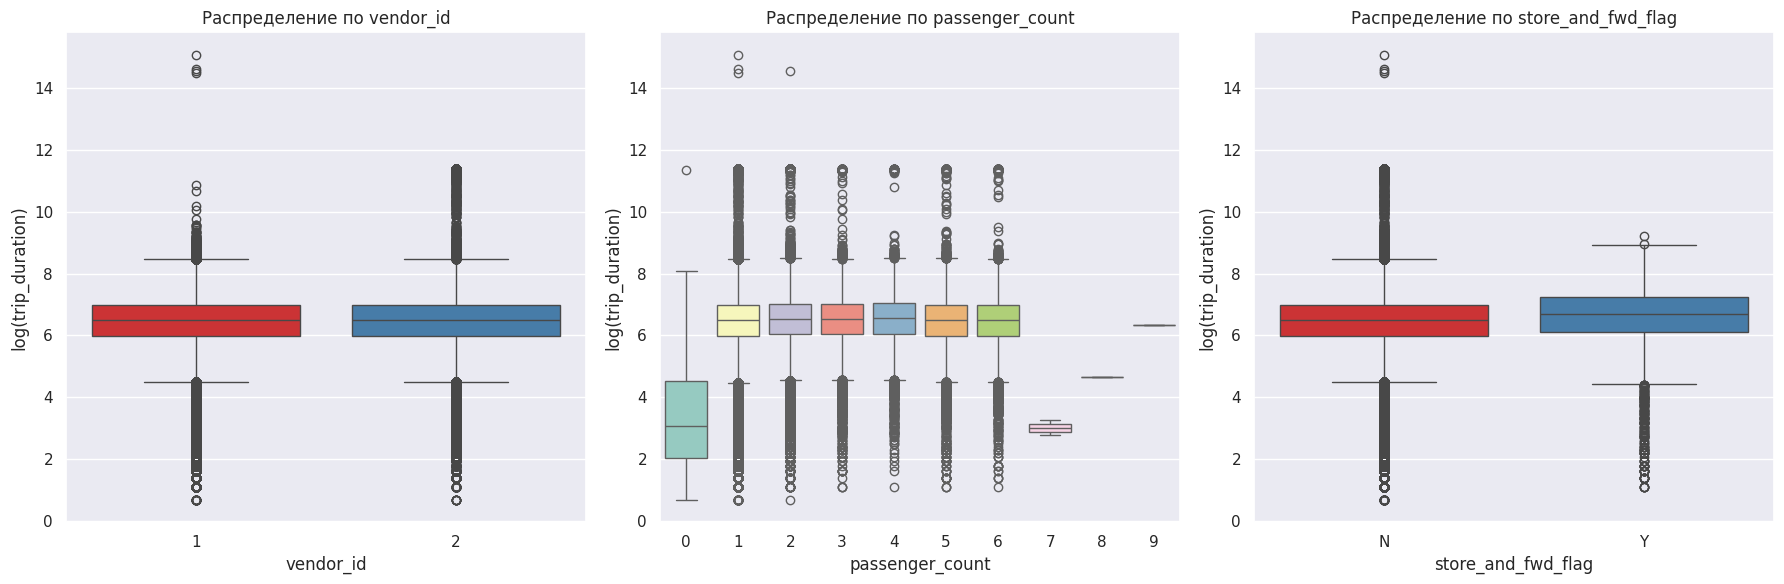

In [50]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import warnings
warnings.simplefilter('ignore')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# vendor_id
sns.boxplot(data=df_train, x='vendor_id', y='log_trip_duration', palette="Set1", ax=axes[0])
axes[0].set_title('Распределение по vendor_id')
axes[0].set_xlabel('vendor_id')
axes[0].set_ylabel('log(trip_duration)')

# passenger_count
sns.boxplot(data=df_train, x='passenger_count', y='log_trip_duration', palette="Set3", ax=axes[1])
axes[1].set_title('Распределение по passenger_count')
axes[1].set_xlabel('passenger_count')
axes[1].set_ylabel('log(trip_duration)')

# store_and_fwd_flag
sns.boxplot(data=df_train, x='store_and_fwd_flag', y='log_trip_duration', palette="Set1", ax=axes[2])
axes[2].set_title('Распределение по store_and_fwd_flag')
axes[2].set_xlabel('store_and_fwd_flag')
axes[2].set_ylabel('log(trip_duration)')

plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['vendor_id'] = X_train['vendor_id'].replace({1: 0, 2: 1})
X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

X_test['vendor_id'] = X_test['vendor_id'].replace({1: 0, 2: 1})
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

print(X_train['vendor_id'].value_counts().sort_index())
print(X_train['store_and_fwd_flag'].value_counts().sort_index())

vendor_id
0    474484
1    546566
Name: count, dtype: int64
store_and_fwd_flag
0    1015403
1       5647
Name: count, dtype: int64


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Судя по графикам распределения логарифма времени поездки, признак vendor_id демонстрирует заметные различия в медианных значениях длительности между разными провайдерами, что указывает на его потенциальную полезность. Признак passenger_count показывает сложную нелинейную зависимость, где экстремальные значения количества пассажиров существенно влияют на продолжительность поездки, что может быть информативно для модели. Что касается store_and_fwd_flag, то разница в распределениях между значениями флага достаточно выражена, особенно в хвостах распределений, что позволяет предположить его значимость для прогнозирования, особенно в аномальных или проблемных ситуациях с передачей данных.

**Задание 12**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [52]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
features_to_add = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
for feature in features_to_add:
    X_train_grid[feature] = df_train.loc[X_train_grid.index, feature]
    X_test_grid[feature] = df_train.loc[X_test_grid.index, feature]

categorical_features = [
    'hour', 'day_of_week', 'month', 'is_traffic_jam', 'is_free_road',
    'pickup_cell_id', 'dropoff_cell_id', 'vendor_id', 'store_and_fwd_flag'
]

numerical_features = [
    'day_of_year', 'haversine', 'log_haversine', 'passenger_count'
]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model = pipeline.fit(X_train_grid, y_train)

y_pred_train = model.predict(X_train_grid)
y_pred_test = model.predict(X_test_grid)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train MSE:  {train_mse:.4f}")
print(f"Test RMSE:  {test_rmse:.4f}")
print(f"Test MSE:   {test_mse:.4f}")

Train RMSE: 0.5473
Train MSE:  0.2995
Test RMSE:  0.5463
Test MSE:   0.2985


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**Ответ:** Особого улучшения модели нет, поэтому не будем учитывать эти признаки.

## Часть 4. Улучшаем модель

**Задание 13**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [53]:
#y_train['log_trip_duration'] = df_train.loc[y_train.index, 'log_trip_duration']

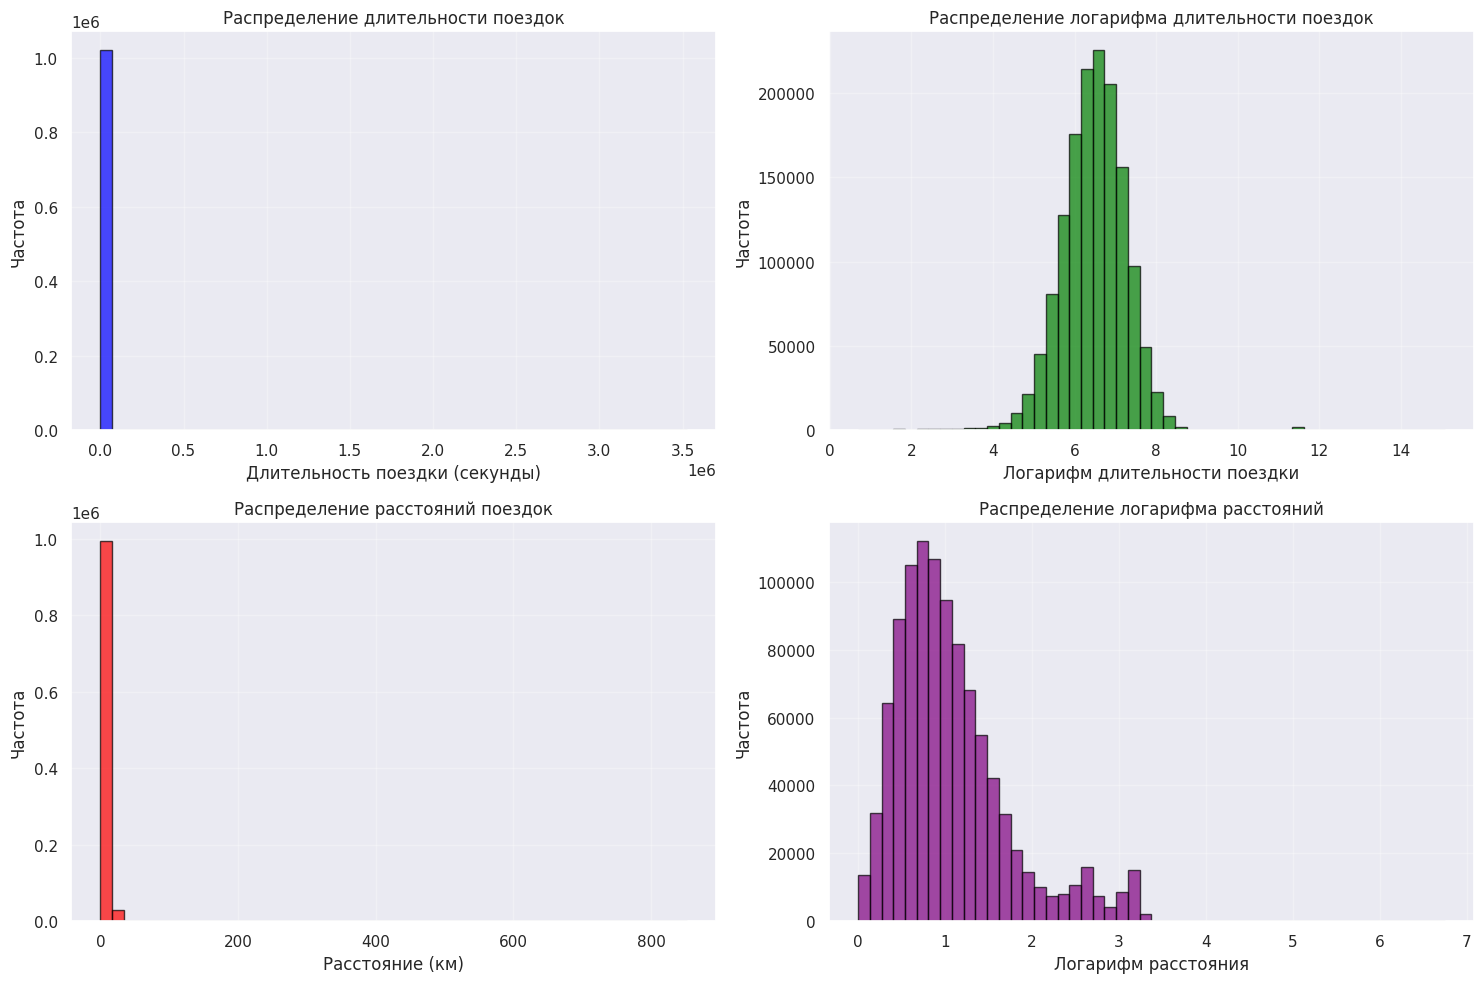

Статистика для определения выбросов:
Длительность поездки: min=1, max=3526282
Расстояние: min=0.0000, max=851.9684
5-й перцентиль длительности: 180.00
95-й перцентиль длительности: 2104.00
5-й перцентиль расстояния: 0.3284
95-й перцентиль расстояния: 12.2938


In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Гистограмма длительности поездки
axes[0, 0].hist(X_train['trip_duration'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_xlabel('Длительность поездки (секунды)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение длительности поездок')
axes[0, 0].grid(alpha=0.3)

# 2. Гистограмма логарифма длительности поездки
axes[0, 1].hist(df_train['log_trip_duration'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('Логарифм длительности поездки')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение логарифма длительности поездок')
axes[0, 1].grid(alpha=0.3)

# 3. Гистограмма расстояния (haversine)
axes[1, 0].hist(X_train['haversine'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1, 0].set_xlabel('Расстояние (км)')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение расстояний поездок')
axes[1, 0].grid(alpha=0.3)

# 4. Гистограмма логарифма расстояния
axes[1, 1].hist(X_train['log_haversine'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_xlabel('Логарифм расстояния')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Распределение логарифма расстояний')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Статистика для определения выбросов:")
print(f"Длительность поездки: min={X_train['trip_duration'].min()}, max={X_train['trip_duration'].max()}")
print(f"Расстояние: min={X_train['haversine'].min():.4f}, max={X_train['haversine'].max():.4f}")
print(f"5-й перцентиль длительности: {X_train['trip_duration'].quantile(0.05):.2f}")
print(f"95-й перцентиль длительности: {X_train['trip_duration'].quantile(0.95):.2f}")
print(f"5-й перцентиль расстояния: {X_train['haversine'].quantile(0.05):.4f}")
print(f"95-й перцентиль расстояния: {X_train['haversine'].quantile(0.95):.4f}")

Границы для фильтрации выбросов:
Длительность: от 87.00 до 3440.00 секунд
Расстояние: до 22.5471 км

Результаты очистки:
Исходный размер обучающей выборки: 1458644
Размер после очистки: 1419118
Удалено объектов: 39526
Процент удаленных: 2.71%


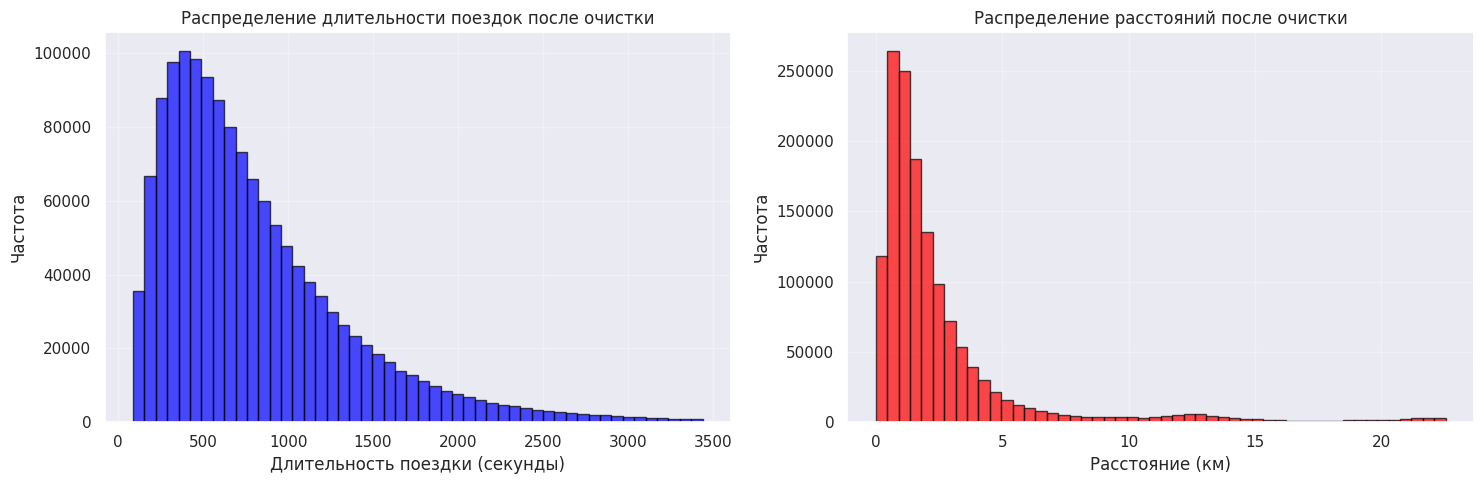

In [55]:
# Границы для выбросов
duration_lower = df_train['trip_duration'].quantile(0.01)  # нижний 1%
duration_upper = df_train['trip_duration'].quantile(0.99)  # верхний 1%
distance_upper = df_train['haversine'].quantile(0.99)      # верхний 1% расстояний

print(f"Границы для фильтрации выбросов:")
print(f"Длительность: от {duration_lower:.2f} до {duration_upper:.2f} секунд")
print(f"Расстояние: до {distance_upper:.4f} км")

# Фильтруем выбросы
initial_size = len(df_train)
df_train_clean = df_train[
    (df_train['trip_duration'] >= duration_lower) &
    (df_train['trip_duration'] <= duration_upper) &
    (df_train['haversine'] <= distance_upper)
].copy()

print(f"\nРезультаты очистки:")
print(f"Исходный размер обучающей выборки: {initial_size}")
print(f"Размер после очистки: {len(df_train_clean)}")
print(f"Удалено объектов: {initial_size - len(df_train_clean)}")
print(f"Процент удаленных: {(initial_size - len(df_train_clean)) / initial_size * 100:.2f}%")

# Визуализация после очистки
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_train_clean['trip_duration'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_xlabel('Длительность поездки (секунды)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение длительности поездок после очистки')
axes[0].grid(alpha=0.3)

axes[1].hist(df_train_clean['haversine'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1].set_xlabel('Расстояние (км)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение расстояний после очистки')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [56]:
print(X_train.info())

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1021050 entries, 1011257 to 121958
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1021050 non-null  object        
 1   vendor_id           1021050 non-null  int64         
 2   pickup_datetime     1021050 non-null  datetime64[ns]
 3   passenger_count     1021050 non-null  int64         
 4   pickup_longitude    1021050 non-null  float64       
 5   pickup_latitude     1021050 non-null  float64       
 6   dropoff_longitude   1021050 non-null  float64       
 7   dropoff_latitude    1021050 non-null  float64       
 8   store_and_fwd_flag  1021050 non-null  int64         
 9   trip_duration       1021050 non-null  int64         
 10  day_of_year         1021050 non-null  int32         
 11  hour                1021050 non-null  int32         
 12  month               1021050 non-null  int32         
 13  day_of_week 

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [57]:
X_train['airport'] = X_train['airport_start'] | X_train['airport_finish']
X_test['airport'] = X_test['airport_start'] | X_test['airport_finish']

In [58]:
X_train['lga'] = X_train['start_lga'] | X_train['end_lga']
X_test['lga'] = X_test['start_lga'] | X_test['end_lga']

X_train['jfk'] = X_train['start_jfk'] | X_train['end_jfk']
X_test['jfk'] = X_test['start_jfk'] | X_test['end_jfk']

In [59]:
X_train['traffic'] = X_train['is_traffic_jam'] | X_train['is_free_road']
X_test['traffic'] = X_test['is_traffic_jam'] | X_test['is_free_road']

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [60]:
categorical_features = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
numerical_features = ['day_of_year', 'log_haversine', 'is_anomaly', 'airport', 'lga', 'jfk', 'traffic']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])

model = pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Результаты обучения Ridge-регрессии")
print("="*60)
print(f"Train RMSE = {train_rmse:.4f}")
print(f"Train MSE  = {train_mse:.4f}")
print(f"Test RMSE  = {test_rmse:.4f}")
print(f"Test MSE   = {test_mse:.4f}")


Результаты обучения Ridge-регрессии
Train RMSE = 0.5595
Train MSE  = 0.3131
Test RMSE  = 0.5588
Test MSE   = 0.3123


**Задание 14**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [61]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Количество признаков до OneHot-кодирования:", X_train.shape)
print("Количество признаков после OneHot-кодирования:", preprocessor.transform(X_train).shape)

Количество признаков до OneHot-кодирования: (1021050, 32)
Количество признаков после OneHot-кодирования: (1021050, 44)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [62]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('scaling', StandardScaler(), numerical_features)
    ]
)

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', preprocessor),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Результаты обучения Lasso-регрессии")
print("="*60)
print(f"Train RMSE = {train_rmse:.4f}")
print(f"Train MSE  = {train_mse:.4f}")
print(f"Test RMSE  = {test_rmse:.4f}")
print(f"Test MSE   = {test_mse:.4f}")

Результаты обучения Lasso-регрессии
Train RMSE = 0.7961
Train MSE  = 0.6337
Test RMSE  = 0.7950
Test MSE   = 0.6321


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [63]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [64]:
from sklearn.model_selection import GridSearchCV

ridge_pipeline = Pipeline(steps=[
     ('ohe_and_scaling', preprocessor),
     ('regression', Ridge())
 ])

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(ridge_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha1 = searcher.best_params_["regression__alpha"]
print("Лучший alpha параметр = %.4f" % best_alpha1)

Лучший alpha параметр = 7.8476


In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaling', StandardScaler(), numerical_features)
    ]
)

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', preprocessor),
    ('regression', Ridge(best_alpha1))
])

model = ridge_pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Результаты обучения Lasso-регрессии")
print("="*60)
print(f"Train RMSE = {train_rmse:.4f}")
print(f"Train MSE  = {train_mse:.4f}")
print(f"Test RMSE  = {test_rmse:.4f}")
print(f"Test MSE   = {test_mse:.4f}")

Результаты обучения Lasso-регрессии
Train RMSE = 0.5603
Train MSE  = 0.3139
Test RMSE  = 0.5588
Test MSE   = 0.3123


In [66]:
from sklearn.model_selection import GridSearchCV

lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', preprocessor),
      ('regression', Lasso())
  ])

alphas = np.logspace(-4, 3, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha_lasso1 = searcher.best_params_["regression__alpha"]
print("Лучший alpha параметр = %.4f" % best_alpha_lasso1)

Лучший alpha параметр = 0.0001


In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaling', StandardScaler(), numerical_features)
    ]
)

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', preprocessor),
    ('regression', Lasso(best_alpha_lasso1))
])

model = lasso_pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Результаты обучения Lasso-регрессии")
print("="*60)
print(f"Train RMSE = {train_rmse:.4f}")
print(f"Train MSE  = {train_mse:.4f}")
print(f"Test RMSE  = {test_rmse:.4f}")
print(f"Test MSE   = {test_mse:.4f}")

Результаты обучения Lasso-регрессии
Train RMSE = 0.5603
Train MSE  = 0.3139
Test RMSE  = 0.5589
Test MSE   = 0.3123


Метрики получились практически одинаковыми для Ridge и Lasso.

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

Всего признаков после OHE: 44
Половина признаков: 22
alpha=0.0100: нулевых весов 38/44 (86.4%), RMSE=0.5755
alpha=0.0183: нулевых весов 39/44 (88.6%), RMSE=0.5793
alpha=0.0336: нулевых весов 43/44 (97.7%), RMSE=0.5857
alpha=0.0616: нулевых весов 43/44 (97.7%), RMSE=0.5880
alpha=0.1129: нулевых весов 43/44 (97.7%), RMSE=0.5956
alpha=0.2069: нулевых весов 43/44 (97.7%), RMSE=0.6203
alpha=0.3793: нулевых весов 43/44 (97.7%), RMSE=0.6967
alpha=0.6952: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=1.2743: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=2.3357: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=4.2813: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=7.8476: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=14.3845: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=26.3665: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=48.3293: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=88.5867: нулевых весов 44/44 (100.0%), RMSE=0.7941
alpha=162.3777: нулевых весов 44/44 (100.0%), RMSE=0.7

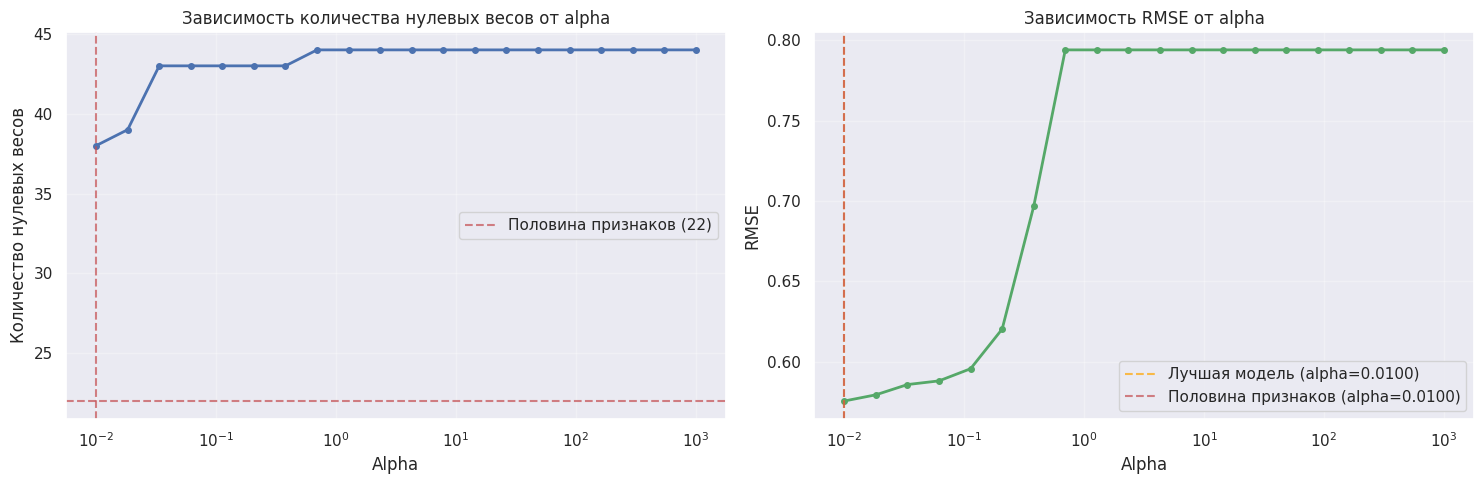


Детали для модели с половиной признаков (alpha=0.0100):
Ненулевых признаков: 6
Нулевых признаков: 38
Всего признаков: 44


In [68]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-2, 3, 20)

categorical_features = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
numerical_features = ['day_of_year', 'log_haversine', 'is_anomaly', 'airport', 'lga', 'jfk', 'traffic']

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
])

preprocessor.fit(X_train)
X_transformed = preprocessor.transform(X_train)
total_features = X_transformed.shape[1]
half_features = total_features // 2

print(f"Всего признаков после OHE: {total_features}")
print(f"Половина признаков: {half_features}")

zero_weights_counts = []
rmse_scores = []
best_rmse = float('inf')
best_alpha = None

for alpha in alphas:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', Lasso(alpha=alpha, random_state=42, max_iter=5000))
    ])

    pipeline.fit(X_train, y_train)

    lasso_model = pipeline.named_steps['regression']

    zero_weights = np.sum(lasso_model.coef_ == 0)
    zero_weights_counts.append(zero_weights)

    # Оценка качества на валидации
    y_val_pred = pipeline.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

    print(f"alpha={alpha:.4f}: нулевых весов {zero_weights}/{total_features} ({(zero_weights/total_features*100):.1f}%), RMSE={rmse:.4f}")

# Точка, где отбрасывается половина признаков
alpha_for_half = None
rmse_for_half = None

for i, (alpha, zero_count) in enumerate(zip(alphas, zero_weights_counts)):
    if zero_count >= half_features:
        alpha_for_half = alpha
        rmse_for_half = rmse_scores[i]
        break

print(f"\nЛучшая модель: alpha={best_alpha:.4f}, RMSE={best_rmse:.4f}")

if alpha_for_half is not None:
    print(f"Alpha для отбрасывания половины признаков: {alpha_for_half:.4f}")
    print(f"RMSE при этом: {rmse_for_half:.4f}")
    print(f"Потери в качестве: {rmse_for_half - best_rmse:.4f} (+{(rmse_for_half - best_rmse)/best_rmse*100:.1f}%)")
else:
    print("Не удалось достичь отбрасывания половины признаков в заданном диапазоне alpha")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Количество нулевых весов от alpha
ax1.semilogx(alphas, zero_weights_counts, 'b-', linewidth=2, marker='o', markersize=4)
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Количество нулевых весов')
ax1.set_title('Зависимость количества нулевых весов от alpha')
ax1.grid(True, alpha=0.3)

# Линия для половины признаков
ax1.axhline(y=half_features, color='r', linestyle='--', alpha=0.7, label=f'Половина признаков ({half_features})')
if alpha_for_half is not None:
    ax1.axvline(x=alpha_for_half, color='r', linestyle='--', alpha=0.7)
ax1.legend()

# График 2: Качество (RMSE) от alpha
ax2.semilogx(alphas, rmse_scores, 'g-', linewidth=2, marker='o', markersize=4)
ax2.set_xlabel('Alpha')
ax2.set_ylabel('RMSE')
ax2.set_title('Зависимость RMSE от alpha')
ax2.grid(True, alpha=0.3)

ax2.axvline(x=best_alpha, color='orange', linestyle='--', alpha=0.7, label=f'Лучшая модель (alpha={best_alpha:.4f})')
if alpha_for_half is not None:
    ax2.axvline(x=alpha_for_half, color='r', linestyle='--', alpha=0.7, label=f'Половина признаков (alpha={alpha_for_half:.4f})')
ax2.legend()

plt.tight_layout()
plt.show()

if alpha_for_half is not None:
    # Обучаем модель с alpha для половины признаков
    pipeline_half = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', Lasso(alpha=alpha_for_half, random_state=42, max_iter=5000))
    ])
    pipeline_half.fit(X_train, y_train)

    lasso_half = pipeline_half.named_steps['regression']

    print(f"\nДетали для модели с половиной признаков (alpha={alpha_for_half:.4f}):")
    print(f"Ненулевых признаков: {np.sum(lasso_half.coef_ != 0)}")
    print(f"Нулевых признаков: {np.sum(lasso_half.coef_ == 0)}")
    print(f"Всего признаков: {len(lasso_half.coef_)}")

**Ответ:** Если мы хотим с помощью Lasso избавиться хотя бы от половины признаков, то придется потерять в качестве 2.97%.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ:** Признак полезный, так как если таких поездок много в обучающих данных, то скорее всего это распространенные поездки => их будет много и в тестовых данных. Линейная модель не может это вытащить, так как это нелинейная зависимость. Получается, что откуда началась поездка и где закончилась, - это отдельные признаки, и наша модель их не комбинирует между, а маршрут (т. е. комбинация этих двух признаков) - это уже новый целый признак.

In [69]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['top100'] = -1
X_train['route'] = X_train['grid_first'].astype(str) + ', ' + X_train['grid_second'].astype(str)

X_test['top100'] = -1
X_test['route'] = X_test['grid_first'].astype(str) + ', ' + X_test['grid_second'].astype(str)

In [70]:
# Cто самых частых частых пар будут последними после сортировки
komb_grid = X_train[(X_train['route'] != 'nan, nan') & (X_train['route'] != '-1, -1')].groupby(['route']).count().sort_values('id').tail(100)

In [71]:
X_train.loc[X_train['route'].isin(komb_grid.index), 'top100'] = X_train['route']

X_test.loc[X_test['route'].isin(komb_grid.index), 'top100'] = X_test['route']

In [72]:
from sklearn.preprocessing import LabelEncoder

X_train['top100'] = X_train['top100'].astype(str)
X_test['top100'] = X_test['top100'].astype(str)

le = LabelEncoder()
X_train['top100'] = le.fit_transform(X_train['top100'])
X_test['top100'] = le.fit_transform(X_test['top100'])

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [73]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second', 'top100']
numerical_features = ['day_of_year', 'log_haversine', 'is_anomaly', 'airport', 'lga', 'jfk', 'traffic']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaling', StandardScaler(), numerical_features)
    ]
)

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', preprocessor),
    ('regression', Lasso(best_alpha_lasso1))
])

model = lasso_pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Результаты обучения Lasso-регрессии")
print("="*60)
print(f"Train RMSE = {train_rmse:.4f}")
print(f"Train MSE  = {train_mse:.4f}")
print(f"Test RMSE  = {test_rmse:.4f}")
print(f"Test MSE   = {test_mse:.4f}")

Результаты обучения Lasso-регрессии
Train RMSE = 0.5395
Train MSE  = 0.2911
Test RMSE  = 0.5380
Test MSE   = 0.2894
